# Survey Data Analysis

In [31]:
import pandas as pd
import os

In [246]:
# General plot configuration
import seaborn as sns
import matplotlib.pyplot as plt

fontsize = 30
smaller_font = fontsize * 2 / 3
line_width = 3
medianprops = dict(color="#3F00FF", alpha=0.7)
box_y_label = "Trust score"
sns.set(font_scale=2)

sns.set_style("whitegrid")
# sns.set_palette('tab10')
# sns.set_palette('winter_r')
# sns.set_palette('pastel')
# sns.set_palette('colorblind')
# sns.set_palette("tab10")
# sns.set_palette("muted")

plt.close("all")
plt.rcParams["figure.figsize"] = [30, 8]

# Read data into pandas

In [32]:
data_path = 'data/'
raw_data = pd.read_csv(os.path.join(data_path, '25AprilSurveyAnswers(1-278).csv'))
raw_data = raw_data.drop(columns=['Email', 'Name'])

In [33]:
health = 'Healthcare'
highstakes = 'Highstake'
ai = 'AI Experience'
dr = 'Doctor'
dr_gb = 'Doctor and Glass-Box'
dr_bb = 'Doctor and Black-Box'
bb = 'Black-Box'
bins = ['low', 'medium', 'high']

raw_data.columns.values[3] = health
raw_data.columns.values[4] = highstakes
raw_data.columns.values[5] = ai
raw_data.columns.values[6] = dr
raw_data.columns.values[7] = dr_gb
raw_data.columns.values[8] = dr_bb
raw_data.columns.values[9] = bb
raw_data

,ID,Start time,Completion time,Healthcare,Highstake,AI Experience,Doctor,Doctor and Glass-Box,Doctor and Black-Box,Black-Box
0,9,3/14/22 12:59:04,3/14/22 13:01:26,No,7,2,10,10,7,5
1,10,3/14/22 13:02:18,3/14/22 13:03:56,No,2,1,9,10,9,7
2,11,3/14/22 13:01:56,3/14/22 13:05:26,No,6,6,8,7,8,9
3,12,3/14/22 13:08:48,3/14/22 13:10:34,Yes,9,2,8,4,2,1
4,13,3/14/22 13:10:14,3/14/22 13:15:56,No,5,7,7,8,5,1
...,...,...,...,...,...,...,...,...,...,...
273,282,4/4/22 10:35:25,4/4/22 10:45:33,Yes,5,1,8,8,9,1
274,283,4/4/22 13:27:33,4/4/22 13:30:57,Yes,8,1,9,10,9,9
275,284,4/5/22 16:17:35,4/5/22 16:21:40,Yes,5,1,8,9,8,9
276,285,4/5/22 16:20:16,4/5/22 16:24:18,No,7,4,7,8,6,6


# Demographics

In [34]:
# binning ai experience into 3 bins:
# Categories (3, interval[float64, right]): [(0.991, 4.0] < (4.0, 7.0] < (7.0, 10.0]]
ai_binned = 'AI Experience'
raw_data[ai_binned] = pd.cut(x=raw_data[ai], bins=3, labels=bins)
raw_data

,ID,Start time,Completion time,Healthcare,Highstake,AI Experience,Doctor,Doctor and Glass-Box,Doctor and Black-Box,Black-Box
0,9,3/14/22 12:59:04,3/14/22 13:01:26,No,7,low,10,10,7,5
1,10,3/14/22 13:02:18,3/14/22 13:03:56,No,2,low,9,10,9,7
2,11,3/14/22 13:01:56,3/14/22 13:05:26,No,6,medium,8,7,8,9
3,12,3/14/22 13:08:48,3/14/22 13:10:34,Yes,9,low,8,4,2,1
4,13,3/14/22 13:10:14,3/14/22 13:15:56,No,5,medium,7,8,5,1
...,...,...,...,...,...,...,...,...,...,...
273,282,4/4/22 10:35:25,4/4/22 10:45:33,Yes,5,low,8,8,9,1
274,283,4/4/22 13:27:33,4/4/22 13:30:57,Yes,8,low,9,10,9,9
275,284,4/5/22 16:17:35,4/5/22 16:21:40,Yes,5,low,8,9,8,9
276,285,4/5/22 16:20:16,4/5/22 16:24:18,No,7,low,7,8,6,6


In [35]:
# Highstakes binned
# binning highstakes experience into 3 bins:
# Categories (3, interval[float64, right]): [(0.991, 4.0] < (4.0, 7.0] < (7.0, 10.0]]
highstakes_binned = 'high-stakes decisions'
raw_data[highstakes_binned] = pd.cut(x=raw_data[highstakes], bins=3, labels=bins)
raw_data

,ID,Start time,Completion time,Healthcare,Highstake,AI Experience,Doctor,Doctor and Glass-Box,Doctor and Black-Box,Black-Box,high-stakes decisions
0,9,3/14/22 12:59:04,3/14/22 13:01:26,No,7,low,10,10,7,5,medium
1,10,3/14/22 13:02:18,3/14/22 13:03:56,No,2,low,9,10,9,7,low
2,11,3/14/22 13:01:56,3/14/22 13:05:26,No,6,medium,8,7,8,9,medium
3,12,3/14/22 13:08:48,3/14/22 13:10:34,Yes,9,low,8,4,2,1,high
4,13,3/14/22 13:10:14,3/14/22 13:15:56,No,5,medium,7,8,5,1,medium
...,...,...,...,...,...,...,...,...,...,...,...
273,282,4/4/22 10:35:25,4/4/22 10:45:33,Yes,5,low,8,8,9,1,medium
274,283,4/4/22 13:27:33,4/4/22 13:30:57,Yes,8,low,9,10,9,9,high
275,284,4/5/22 16:17:35,4/5/22 16:21:40,Yes,5,low,8,9,8,9,medium
276,285,4/5/22 16:20:16,4/5/22 16:24:18,No,7,low,7,8,6,6,medium


In [36]:
#Count in demographics
raw_data['Healthcare'].value_counts()

No     148
Yes    130
Name: Healthcare, dtype: int64

In [37]:
raw_data[ai_binned].value_counts()

low       104
high       97
medium     77
Name: AI Experience, dtype: int64

In [38]:
raw_data[highstakes_binned].value_counts()

medium    121
low       117
high       40
Name: high-stakes decisions, dtype: int64

# Statistics by Demographics

In [39]:
#Overall
raw_data[[dr, dr_gb, dr_bb, bb]].describe()

,Doctor,Doctor and Glass-Box,Doctor and Black-Box,Black-Box
count,278.000000,278.000000,278.000000,278.000000
mean,7.931655,8.179856,7.467626,6.625899
std,1.265626,1.608873,1.972014,2.387614
min,1.000000,1.000000,1.000000,1.000000
25%,8.000000,8.000000,6.000000,5.000000
50%,8.000000,9.000000,8.000000,7.000000
75%,9.000000,9.000000,9.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000


In [40]:
#HCP
raw_data[[dr, dr_gb, dr_bb, bb]].loc[raw_data[health] == 'Yes'].describe()

,Doctor,Doctor and Glass-Box,Doctor and Black-Box,Black-Box
count,130.000000,130.000000,130.000000,130.000000
mean,7.861538,8.169231,7.315385,6.684615
std,1.407366,1.545880,1.996255,2.336215
min,1.000000,1.000000,1.000000,1.000000
25%,7.000000,8.000000,6.000000,5.000000
50%,8.000000,8.500000,8.000000,7.500000
75%,8.000000,9.000000,9.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000


In [41]:
#non-HCP
raw_data[[dr, dr_gb, dr_bb, bb]].loc[raw_data[health] == 'No'].describe()

,Doctor,Doctor and Glass-Box,Doctor and Black-Box,Black-Box
count,148.000000,148.000000,148.000000,148.000000
mean,7.993243,8.189189,7.601351,6.574324
std,1.127858,1.667420,1.947403,2.438610
min,3.000000,1.000000,1.000000,1.000000
25%,8.000000,8.000000,7.000000,5.000000
50%,8.000000,9.000000,8.000000,7.000000
75%,9.000000,9.000000,9.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000


In [42]:
#low AI
raw_data[[dr, dr_gb, dr_bb, bb]].loc[raw_data[ai_binned] == 'low'].describe()

,Doctor,Doctor and Glass-Box,Doctor and Black-Box,Black-Box
count,104.000000,104.000000,104.000000,104.000000
mean,8.067308,8.038462,7.144231,6.538462
std,1.286709,1.700503,2.240051,2.476778
min,1.000000,1.000000,1.000000,1.000000
25%,8.000000,8.000000,6.000000,5.000000
50%,8.000000,8.000000,8.000000,7.000000
75%,9.000000,9.000000,9.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000


In [43]:
#medium AI
raw_data[[dr, dr_gb, dr_bb, bb]].loc[raw_data[ai_binned] == 'medium'].describe()

,Doctor,Doctor and Glass-Box,Doctor and Black-Box,Black-Box
count,77.000000,77.000000,77.000000,77.000000
mean,7.818182,8.311688,7.766234,6.922078
std,1.060378,1.016440,1.468047,2.082295
min,5.000000,5.000000,3.000000,1.000000
25%,7.000000,8.000000,7.000000,5.000000
50%,8.000000,8.000000,8.000000,8.000000
75%,8.000000,9.000000,9.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000


In [44]:
#high AI
raw_data[[dr, dr_gb, dr_bb, bb]].loc[raw_data[ai_binned] == 'high'].describe()

,Doctor,Doctor and Glass-Box,Doctor and Black-Box,Black-Box
count,97.000000,97.000000,97.000000,97.000000
mean,7.876289,8.226804,7.577320,6.484536
std,1.386375,1.873639,1.983447,2.517081
min,1.000000,1.000000,1.000000,1.000000
25%,8.000000,8.000000,6.000000,5.000000
50%,8.000000,9.000000,8.000000,7.000000
75%,9.000000,9.000000,9.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000


In [45]:
#low high-stakes
raw_data[[dr, dr_gb, dr_bb, bb]].loc[raw_data[highstakes_binned] == 'low'].describe()

,Doctor,Doctor and Glass-Box,Doctor and Black-Box,Black-Box
count,117.000000,117.000000,117.000000,117.000000
mean,8.051282,8.102564,7.401709,6.111111
std,1.165940,1.863370,2.080533,2.497508
min,3.000000,1.000000,1.000000,1.000000
25%,8.000000,8.000000,7.000000,5.000000
50%,8.000000,9.000000,8.000000,7.000000
75%,9.000000,9.000000,9.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000


In [46]:
#medium high-stakes
raw_data[[dr, dr_gb, dr_bb, bb]].loc[raw_data[highstakes_binned] == 'medium'].describe()

,Doctor,Doctor and Glass-Box,Doctor and Black-Box,Black-Box
count,121.000000,121.000000,121.000000,121.000000
mean,7.834711,8.297521,7.454545,6.917355
std,1.439601,1.400266,1.839384,2.215802
min,1.000000,1.000000,1.000000,1.000000
25%,8.000000,8.000000,6.000000,6.000000
50%,8.000000,9.000000,8.000000,7.000000
75%,8.000000,9.000000,9.000000,9.000000
max,10.000000,10.000000,10.000000,10.000000


In [47]:
#high high-stakes
raw_data[[dr, dr_gb, dr_bb, bb]].loc[raw_data[highstakes_binned] == 'high'].describe()

,Doctor,Doctor and Glass-Box,Doctor and Black-Box,Black-Box
count,40.000000,40.000000,40.000000,40.000000
mean,7.875000,8.050000,7.700000,7.250000
std,0.938835,1.395046,2.065591,2.317713
min,6.000000,4.000000,2.000000,1.000000
25%,7.000000,7.000000,7.000000,6.000000
50%,8.000000,8.000000,9.000000,8.000000
75%,8.000000,9.000000,9.000000,9.000000
max,10.000000,10.000000,10.000000,10.000000


In [48]:
raw_data[[dr, dr_gb, dr_bb, bb]].loc[raw_data[ai_binned] == 'medium'].loc[raw_data[health] == 'Yes'].describe()

,Doctor,Doctor and Glass-Box,Doctor and Black-Box,Black-Box
count,42.000000,42.000000,42.000000,42.000000
mean,7.833333,8.500000,7.690476,6.952381
std,1.247762,0.993884,1.600123,2.117896
min,5.000000,6.000000,3.000000,2.000000
25%,7.000000,8.000000,7.000000,5.000000
50%,8.000000,9.000000,8.000000,8.000000
75%,8.000000,9.000000,9.000000,8.750000
max,10.000000,10.000000,10.000000,10.000000


In [49]:
raw_data[[dr, dr_gb, dr_bb, bb]].loc[(raw_data[health] == 'medium') | (raw_data[health] == 'Yes')].describe()

,Doctor,Doctor and Glass-Box,Doctor and Black-Box,Black-Box
count,130.000000,130.000000,130.000000,130.000000
mean,7.861538,8.169231,7.315385,6.684615
std,1.407366,1.545880,1.996255,2.336215
min,1.000000,1.000000,1.000000,1.000000
25%,7.000000,8.000000,6.000000,5.000000
50%,8.000000,8.500000,8.000000,7.500000
75%,8.000000,9.000000,9.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000


In [50]:
raw_data[[dr, dr_gb, dr_bb, bb]].loc[(raw_data[health] != 'medium') & (raw_data[health] != 'Yes')].describe()

,Doctor,Doctor and Glass-Box,Doctor and Black-Box,Black-Box
count,148.000000,148.000000,148.000000,148.000000
mean,7.993243,8.189189,7.601351,6.574324
std,1.127858,1.667420,1.947403,2.438610
min,3.000000,1.000000,1.000000,1.000000
25%,8.000000,8.000000,7.000000,5.000000
50%,8.000000,9.000000,8.000000,7.000000
75%,9.000000,9.000000,9.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000


### Mean Trust Score Visualisation

In [84]:
### Mean values
mean_overall = raw_data[[dr, dr_gb, dr_bb, bb]].mean().reset_index().rename(columns={0: "Overall"})
mean_hcp =
raw_data[[dr, dr_gb, dr_bb, bb]].loc[raw_data[health] == 'Yes'].mean().reset_index().rename(columns={0: "HCP"})["HCP"]
mean_nonhcp =
raw_data[[dr, dr_gb, dr_bb, bb]].loc[raw_data[health] == 'No'].mean().reset_index().rename(columns={0: "non-HCP"})[
    "non-HCP"]
mean_lowai =
raw_data[[dr, dr_gb, dr_bb, bb]].loc[raw_data[ai_binned] == 'low'].mean().reset_index().rename(columns={0: "low AI"})[
    "low AI"]
mean_mediumai = raw_data[[dr, dr_gb, dr_bb, bb]].loc[raw_data[ai_binned] == 'medium'].mean().reset_index().rename(
    columns={0: "medium AI"})["medium AI"]
mean_highai =
raw_data[[dr, dr_gb, dr_bb, bb]].loc[raw_data[ai_binned] == 'high'].mean().reset_index().rename(columns={0: "high AI"})[
    "high AI"]
mean_lowhs = raw_data[[dr, dr_gb, dr_bb, bb]].loc[raw_data[highstakes_binned] == 'low'].mean().reset_index().rename(
    columns={0: "low high-stakes"})["low high-stakes"]
mean_mediumhs =
raw_data[[dr, dr_gb, dr_bb, bb]].loc[raw_data[highstakes_binned] == 'medium'].mean().reset_index().rename(
    columns={0: "medium high-stakes"})["medium high-stakes"]
mean_highhs = raw_data[[dr, dr_gb, dr_bb, bb]].loc[raw_data[highstakes_binned] == 'high'].mean().reset_index().rename(
    columns={0: "high high-stakes"})["high high-stakes"]
mean_data = pd.concat(
    [mean_overall, mean_hcp, mean_nonhcp, mean_lowai, mean_mediumai, mean_highai, mean_lowhs, mean_mediumhs,
     mean_highhs], axis=1)
mean_data

,index,Overall,HCP,non-HCP,low AI,medium AI,high AI,low high-stakes,medium high-stakes,high high-stakes
0,Doctor,7.931655,7.861538,7.993243,8.067308,7.818182,7.876289,8.051282,7.834711,7.875
1,Doctor and Glass-Box,8.179856,8.169231,8.189189,8.038462,8.311688,8.226804,8.102564,8.297521,8.050
2,Doctor and Black-Box,7.467626,7.315385,7.601351,7.144231,7.766234,7.577320,7.401709,7.454545,7.700
3,Black-Box,6.625899,6.684615,6.574324,6.538462,6.922078,6.484536,6.111111,6.917355,7.250


<AxesSubplot:xlabel='index'>

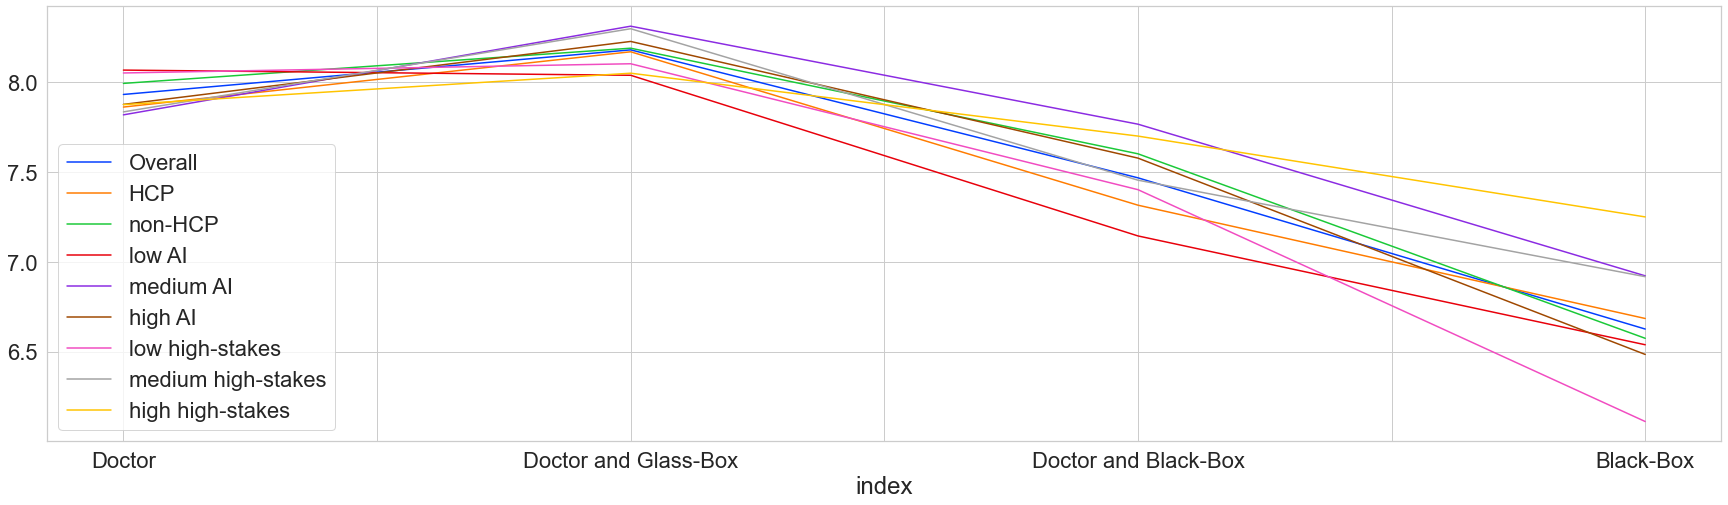

In [86]:
plt.rcParams["figure.figsize"] = [30, 8]
mean_data.plot.line(x="index")

### Confidence Interval Visualisation for mean

In [228]:
# Calculate and plot Confidence Interval
import math
from matplotlib.patches import Patch


# ci96_hi = mean + 1.96*std/math.sqrt(count)
def calculate_hi_ci(column):
    return column['mean'] + 1.96 * column["std"] / math.sqrt(column["count"])


# ci96_lo = mean - 1.96*std/math.sqrt(count)
def calculate_lo_ci(column):
    return column['mean'] - 1.96 * column["std"] / math.sqrt(column["count"])


# Calculate statistics df from a demographic df, e.g: for HCP: demographic_df = raw_data[[dr, dr_gb, dr_bb, bb]].loc[raw_data[health] == 'Yes']
def calculate_statistics_df_from_demographic(demographic_df):
    stat_df = demographic_df.agg(['mean', 'count', 'std'])
    stat_df.loc["ci96_hi"] = stat_df.apply(calculate_hi_ci)
    stat_df.loc["ci96_lo"] = stat_df.apply(calculate_lo_ci)
    return stat_df


# Confidence Interval Plot, x = scenarios, y= Trust score
def calculate_x_positions(horizontal_line_width, items, x):
    if items == 1:
        return [x]

    even = items // 2  # number of items on either side of x
    uneven = items % 2  # if 0 non is on x if 1 there's a line on x
    half_line = horizontal_line_width / 2
    xs = []
    x_start = x
    if uneven == 0:  # no line on x
        x_start = x - (even * horizontal_line_width + (even - 1) * horizontal_line_width) - half_line
    if uneven == 1:  # there's a line on x
        x_start = x - (half_line + horizontal_line_width + (
                even * horizontal_line_width + (even - 1) * horizontal_line_width))
    for i in range(items):
        x_corrected = x_start + half_line
        xs.append(x_corrected)
        x_start = x_corrected + horizontal_line_width + half_line
    return xs


def plot_confidence_interval(x, values_dfs, axes=None, labels=[]):
    # figure out where to paint the lines
    horizontal_line_width = 0.1
    items = len(values_dfs)
    xs = calculate_x_positions(horizontal_line_width, items, x)
    colours = plt.rcParams['axes.prop_cycle'].by_key()['color']
    legend_elements = []

    for i in range(items):
        df_ = values_dfs[i]
        left = xs[i] - horizontal_line_width / 2
        right = xs[i] + horizontal_line_width / 2

        top = df_.loc["ci96_hi"]
        bottom = df_.loc["ci96_lo"]
        mean = df_.loc["mean"]

        axes.plot([xs[i], xs[i]], [top, bottom], color=colours[i], linewidth=line_width)
        axes.plot([left, right], [top, top], color=colours[i], linewidth=line_width)
        axes.plot([left, right], [bottom, bottom], color=colours[i], linewidth=line_width)
        axes.plot(xs[i], mean, 'o', color='#f44336', markersize=10)
        legend_elements.append(
            Patch(facecolor=colours[i], edgecolor=plt.rcParams['text.color'], label=labels[i] if labels else ''))

        # show legend if more than one df
        if labels:
            axes.legend(handles=legend_elements, loc="lower left")


#filters the same scenario from a list of dfs and returns a list of dfs with just that scenario
def get_scenario_dfs(dfs, scenario):
    sub_dfs = []
    for df in dfs:
        sub_dfs.append(df[[scenario]])
    return sub_dfs


def plot_confidence_intervals_for_scenarios_and_demographics(dfs, title="", axes=None, showy=False, labels=[]):
    axes.set_xticks([1, 2, 3, 4], dfs[0].columns, rotation=90)
    axes.set_title(title)
    if showy:
        axes.set_ylabel('Trust Score')

    plot_confidence_interval(1, get_scenario_dfs(dfs, dr), axes=axes, labels=labels)
    plot_confidence_interval(2, get_scenario_dfs(dfs, dr_gb), axes=axes, labels=labels)
    plot_confidence_interval(3, get_scenario_dfs(dfs, dr_bb), axes=axes, labels=labels)
    plot_confidence_interval(4, get_scenario_dfs(dfs, bb), axes=axes, labels=labels)

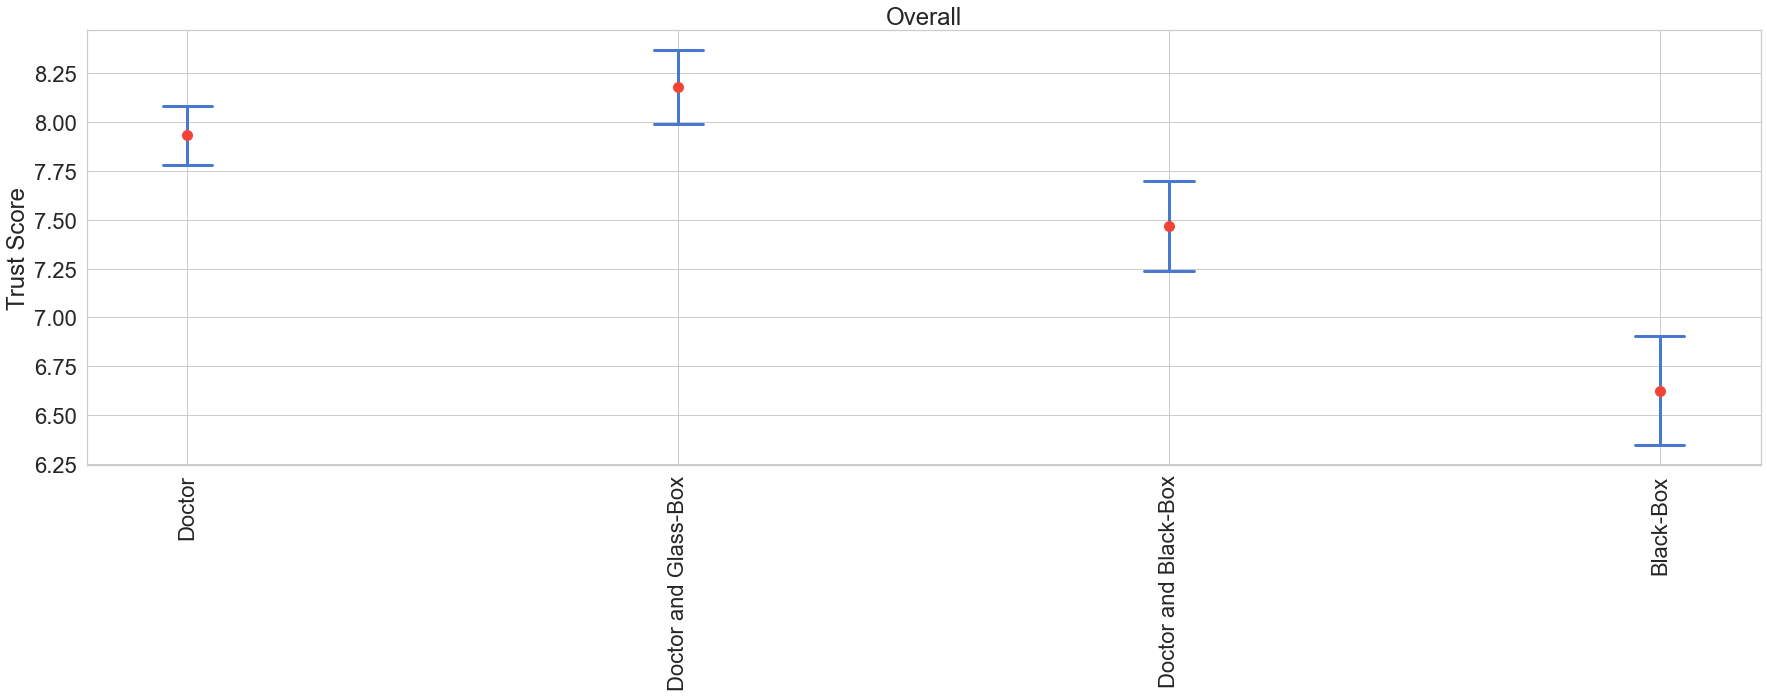

In [239]:
def overall_confidence_plot(axes, showy=False):
    df = calculate_statistics_df_from_demographic(raw_data[[dr, dr_gb, dr_bb, bb]])
    plot_confidence_intervals_for_scenarios_and_demographics([df], 'Overall', axes, showy)


fig, ax = plt.subplots()
overall_confidence_plot(axes=ax, showy=True)

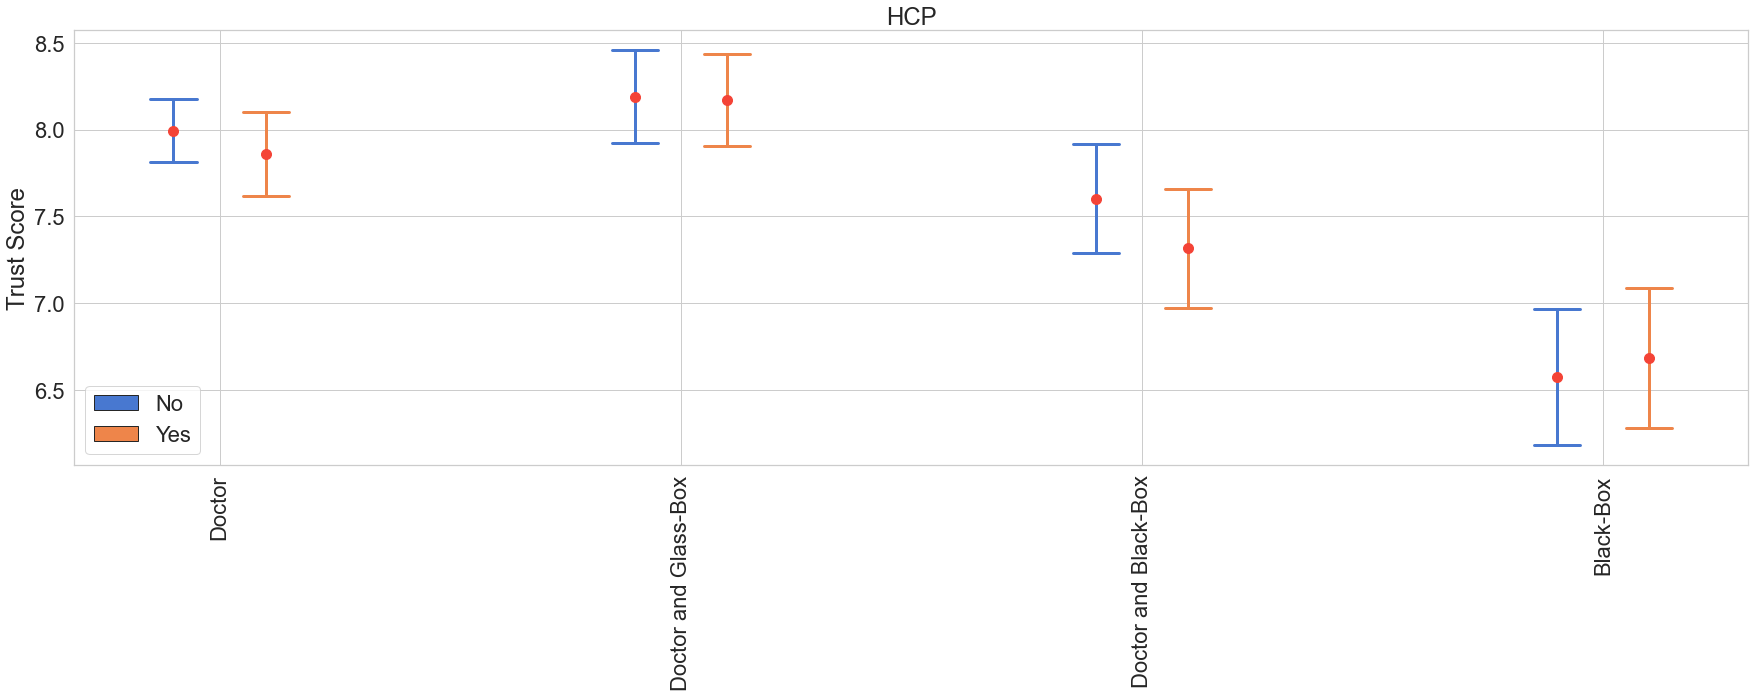

In [240]:
def hcp_confidence_plot(axes, showy=False):
    non_hcp = calculate_statistics_df_from_demographic(raw_data[[dr, dr_gb, dr_bb, bb]].loc[raw_data[health] == 'No'])
    hcp = calculate_statistics_df_from_demographic(raw_data[[dr, dr_gb, dr_bb, bb]].loc[raw_data[health] == 'Yes'])
    plot_confidence_intervals_for_scenarios_and_demographics([non_hcp, hcp], 'HCP', axes, showy, ['No', 'Yes'])


fig, ax = plt.subplots()
hcp_confidence_plot(axes=ax, showy=True)

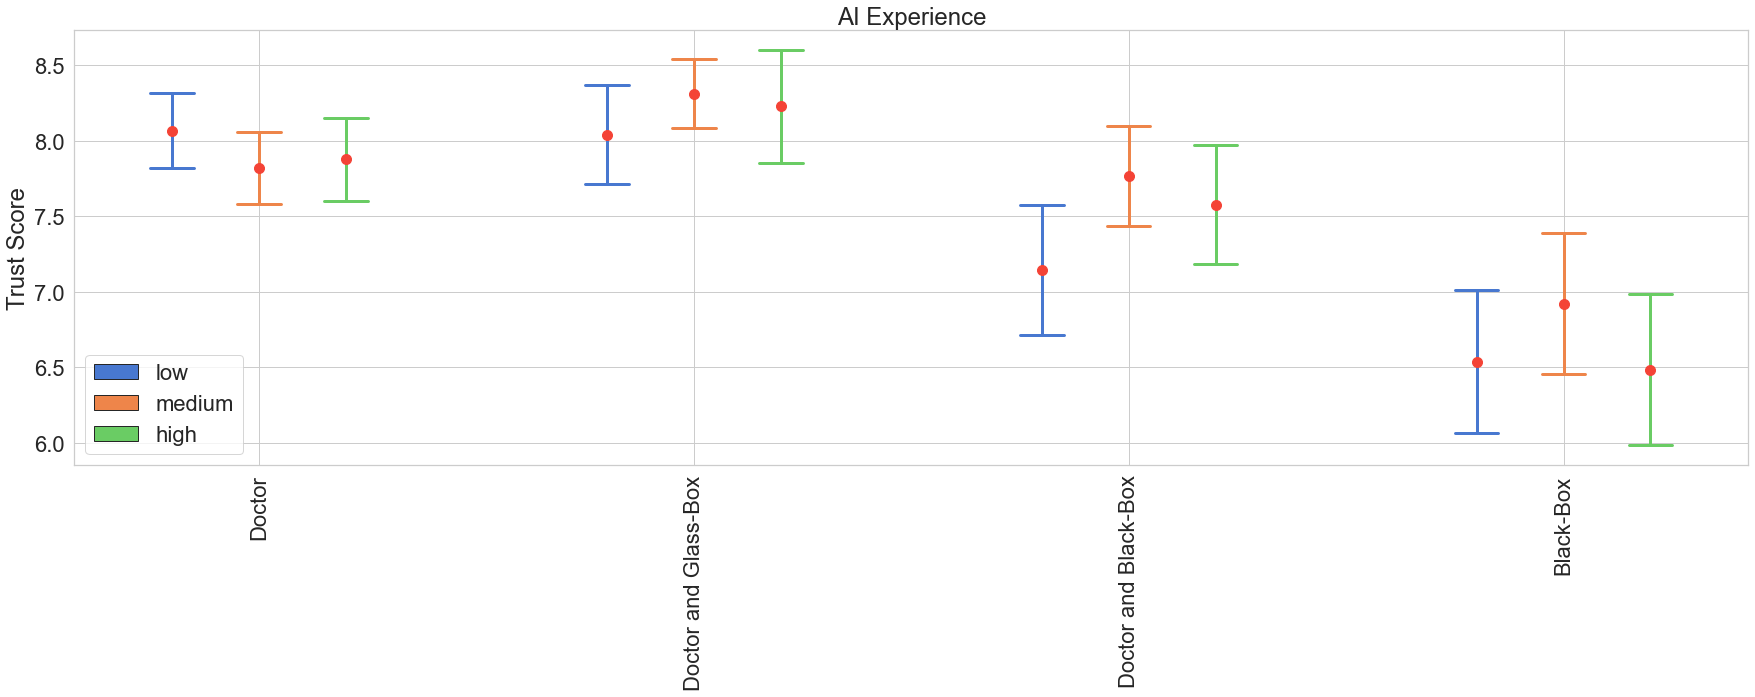

In [241]:
def ai_confidence_plot(axes, showy=False):
    low_ai = calculate_statistics_df_from_demographic(
        raw_data[[dr, dr_gb, dr_bb, bb]].loc[raw_data[ai_binned] == 'low'])
    medium_ai = calculate_statistics_df_from_demographic(
        raw_data[[dr, dr_gb, dr_bb, bb]].loc[raw_data[ai_binned] == 'medium'])
    high_ai = calculate_statistics_df_from_demographic(
        raw_data[[dr, dr_gb, dr_bb, bb]].loc[raw_data[ai_binned] == 'high'])
    plot_confidence_intervals_for_scenarios_and_demographics([low_ai, medium_ai, high_ai], 'AI Experience', axes, showy,
                                                             bins)


fig, ax = plt.subplots()
ai_confidence_plot(axes=ax, showy=True)

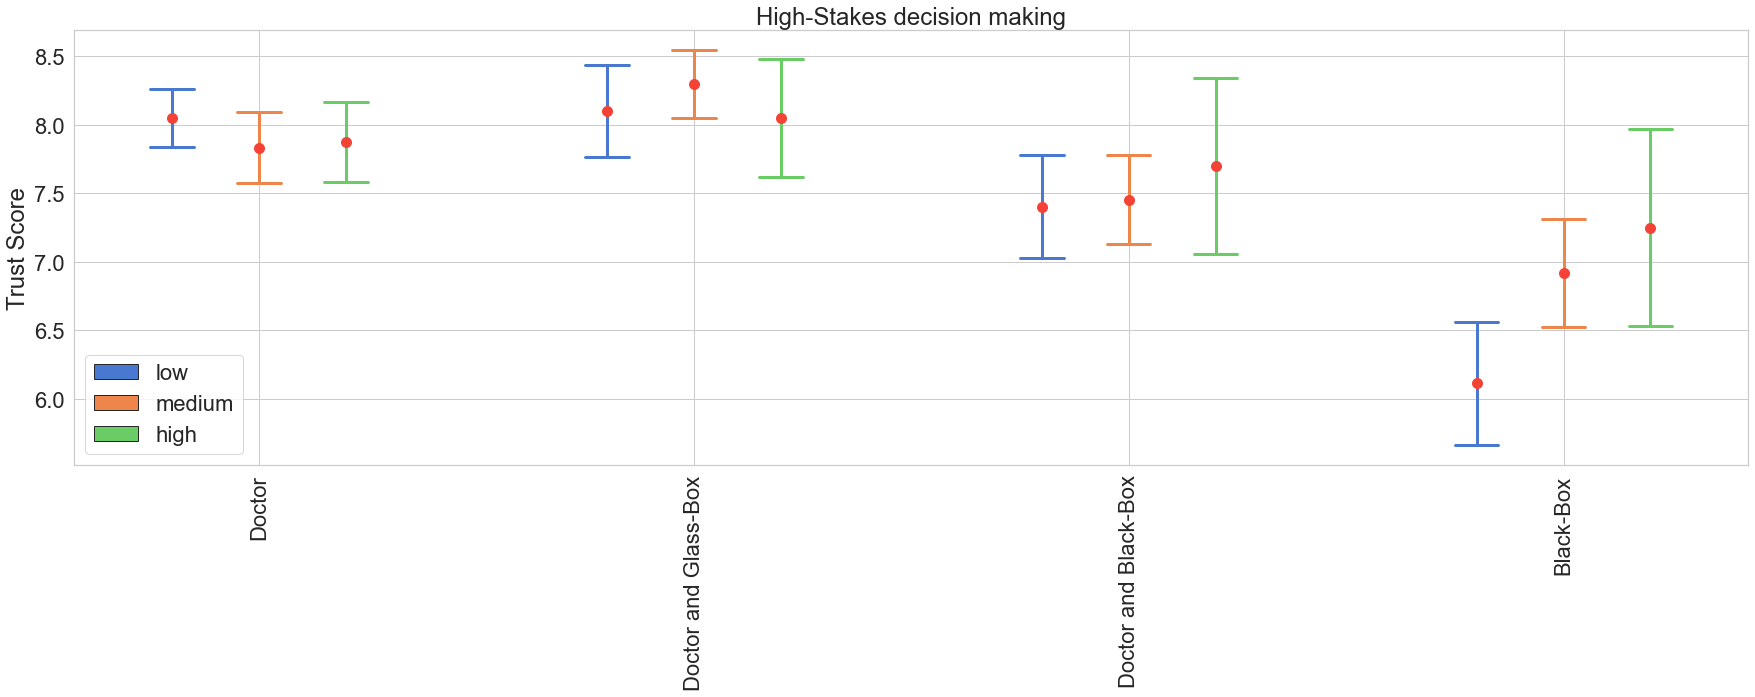

In [242]:
def hs_confidence_plot(axes, showy=False):
    low_hs = calculate_statistics_df_from_demographic(
        raw_data[[dr, dr_gb, dr_bb, bb]].loc[raw_data[highstakes_binned] == 'low'])
    medium_hs = calculate_statistics_df_from_demographic(
        raw_data[[dr, dr_gb, dr_bb, bb]].loc[raw_data[highstakes_binned] == 'medium'])
    high_hs = calculate_statistics_df_from_demographic(
        raw_data[[dr, dr_gb, dr_bb, bb]].loc[raw_data[highstakes_binned] == 'high'])
    plot_confidence_intervals_for_scenarios_and_demographics([low_hs, medium_hs, high_hs],
                                                             'High-Stakes decision making', axes, showy, bins)


fig, ax = plt.subplots()
hs_confidence_plot(axes=ax, showy=True)

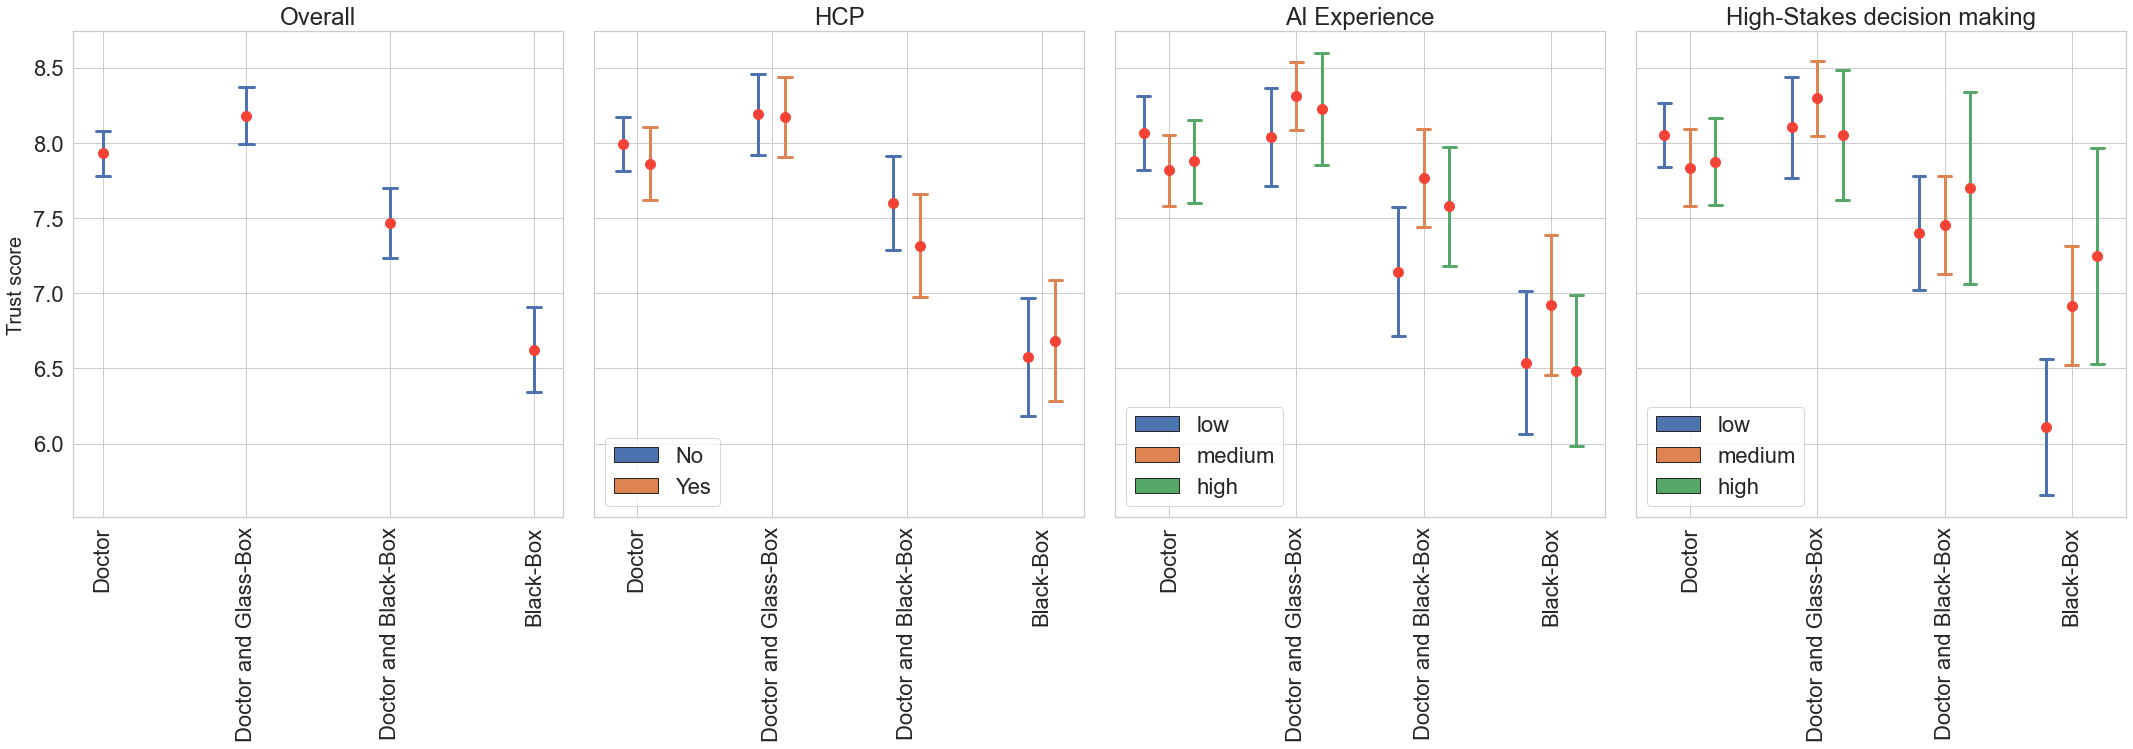

In [247]:
# Arrange in One chart
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True)
fig.tight_layout(h_pad=1, w_pad=0)
fig.text(0, 0.5, box_y_label, va='center', rotation='vertical', fontsize=smaller_font)

overall_confidence_plot(axes[0])
hcp_confidence_plot(axes[1])
ai_confidence_plot(axes[2])
hs_confidence_plot(axes[3])

In [198]:
colours = plt.rcParams['axes.prop_cycle'].by_key()['color']


list

### Box Plots

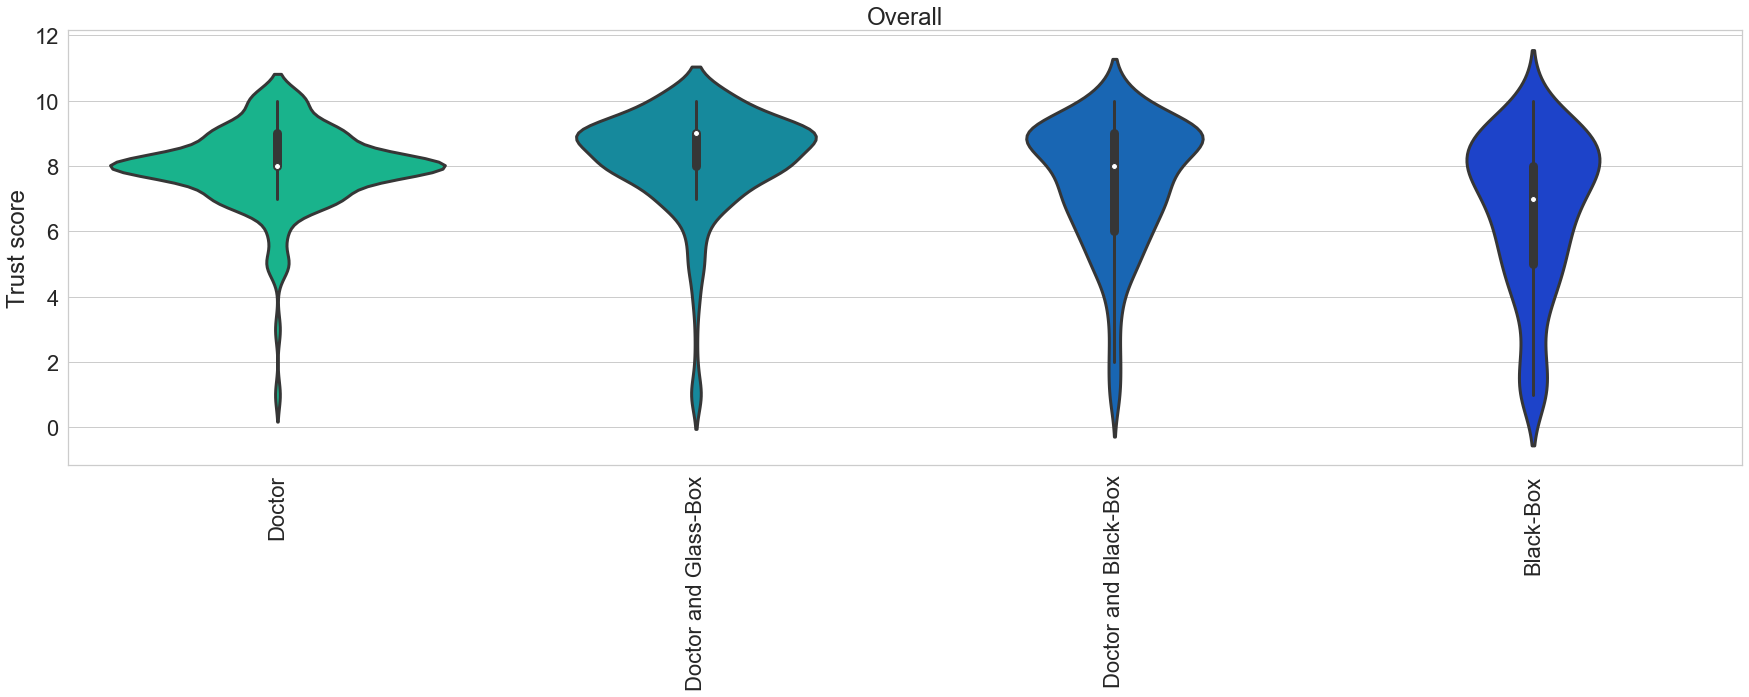

In [56]:
def overall_violin_plot(axes=None, showy=False):
    overall_df = pd.melt(raw_data[[health, dr, dr_gb, dr_bb, bb]], id_vars=[health])
    ax = sns.violinplot(x="variable", y="value", data=overall_df, linewidth=line_width, medianprops=medianprops,
                        ax=axes, palette='winter_r')
    ax.set_ylabel("")
    ax.set_xlabel("")
    if showy:
        ax.set_ylabel(box_y_label)
    ax.set_title('Overall')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


overall_violin_plot(showy=True)

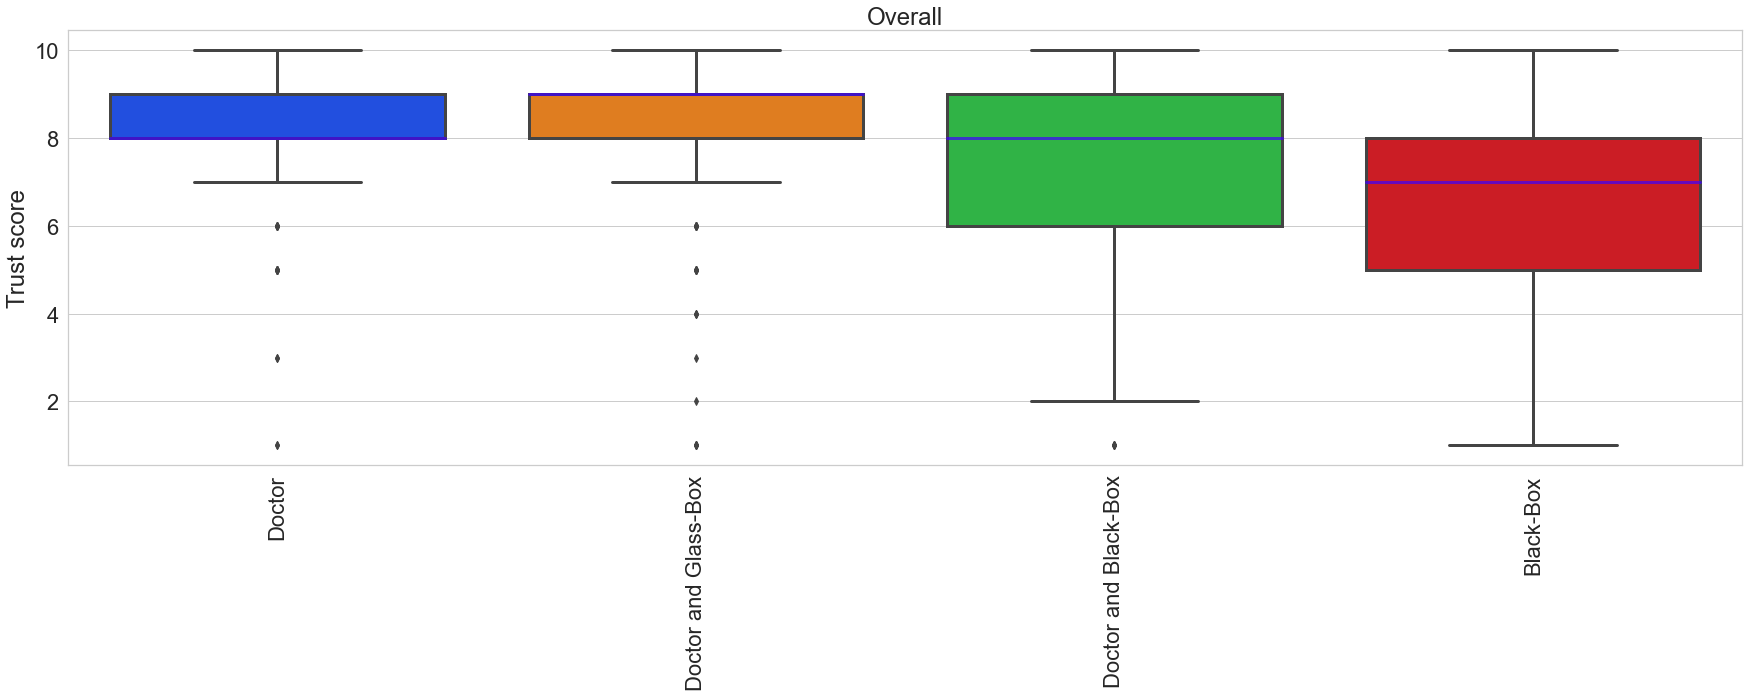

In [57]:
def overall_box_plot(axes=None, showy=False):
    overall_df = pd.melt(raw_data[[health, dr, dr_gb, dr_bb, bb]], id_vars=[health])
    ax = sns.boxplot(x="variable", y="value", data=overall_df, linewidth=line_width, medianprops=medianprops, ax=axes)
    ax.set_ylabel("")
    ax.set_xlabel("")
    if showy:
        ax.set_ylabel(box_y_label)
    ax.set_title('Overall')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


overall_box_plot(showy=True)

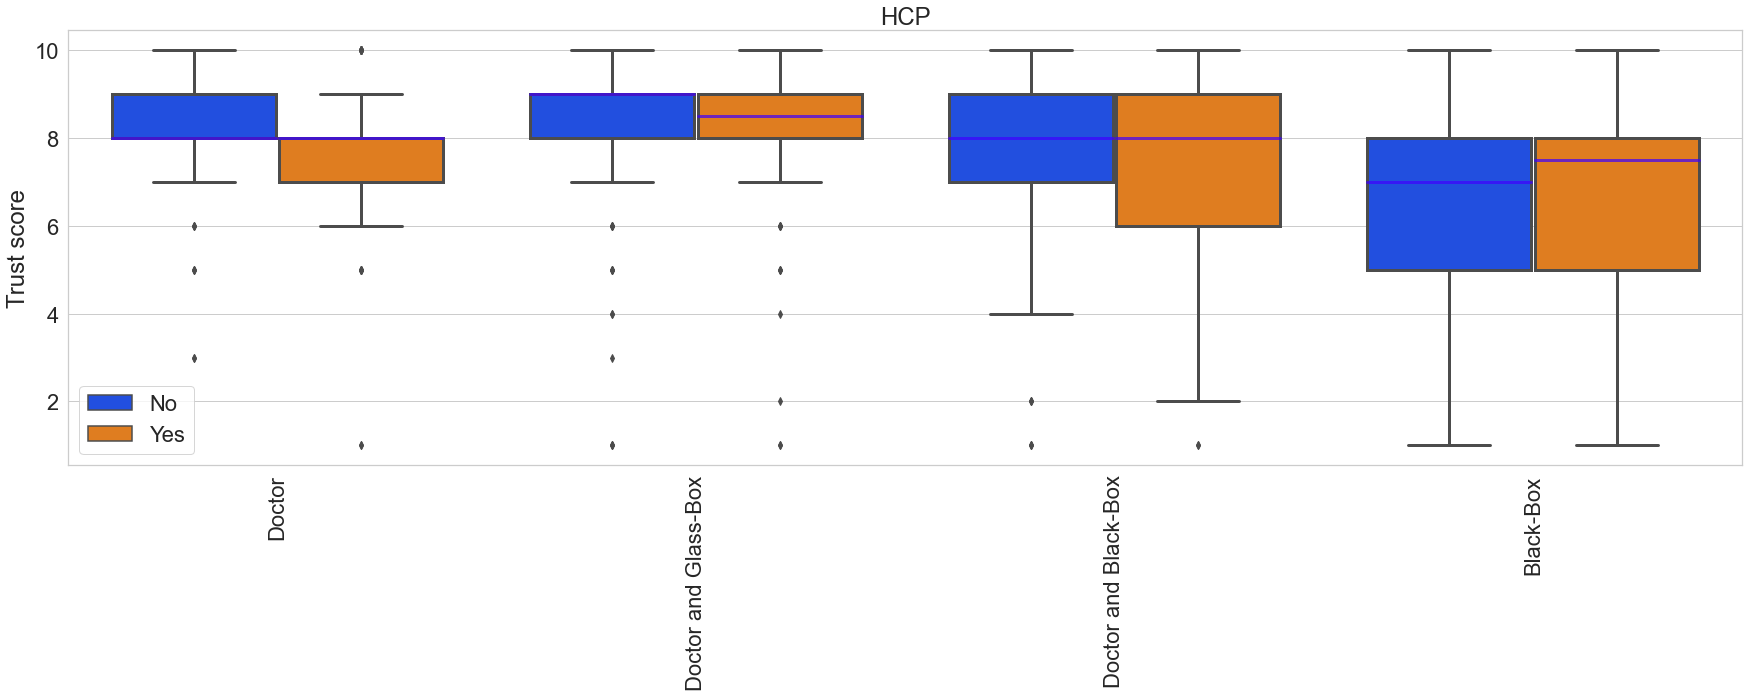

In [58]:
def hcp_box_plot(axes=None, showy=False):
    hcp_df = pd.melt(raw_data[[health, dr, dr_gb, dr_bb, bb]], id_vars=[health])
    ax = sns.boxplot(x="variable", y="value", data=hcp_df, hue=health, linewidth=line_width, medianprops=medianprops,
                     ax=axes)
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_title('HCP')
    ax.get_legend().set_title('')
    if showy:
        ax.set_ylabel(box_y_label)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.legend(loc='lower left')


hcp_box_plot(showy=True)

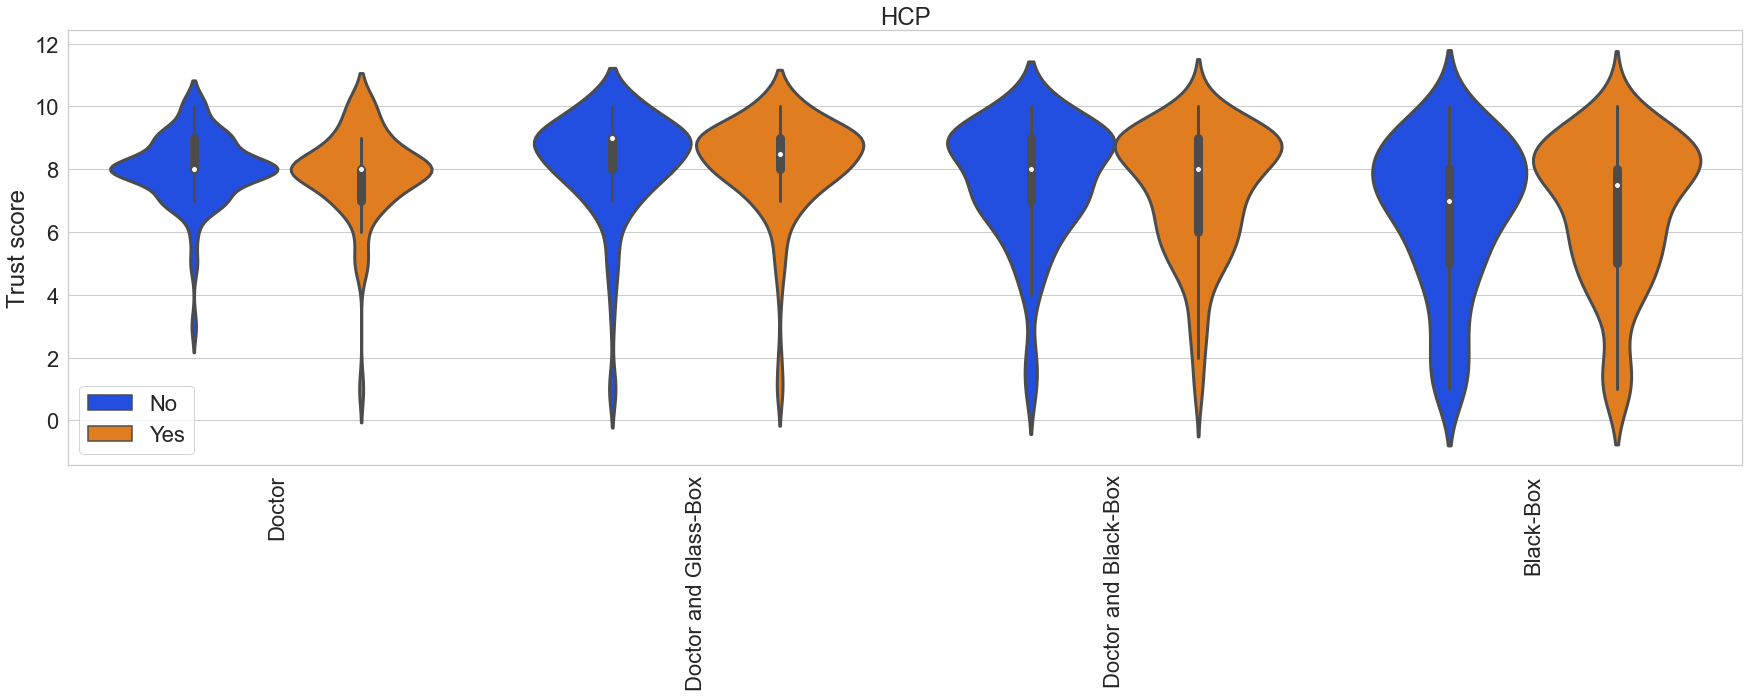

In [59]:
def hcp_violin_plot(axes=None, showy=False):
    hcp_df = pd.melt(raw_data[[health, dr, dr_gb, dr_bb, bb]], id_vars=[health])
    ax = sns.violinplot(x="variable", y="value", data=hcp_df, hue=health, linewidth=line_width, medianprops=medianprops,
                        ax=axes)
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_title('HCP')
    ax.get_legend().set_title('')
    if showy:
        ax.set_ylabel(box_y_label)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.legend(loc='lower left')


hcp_violin_plot(showy=True)

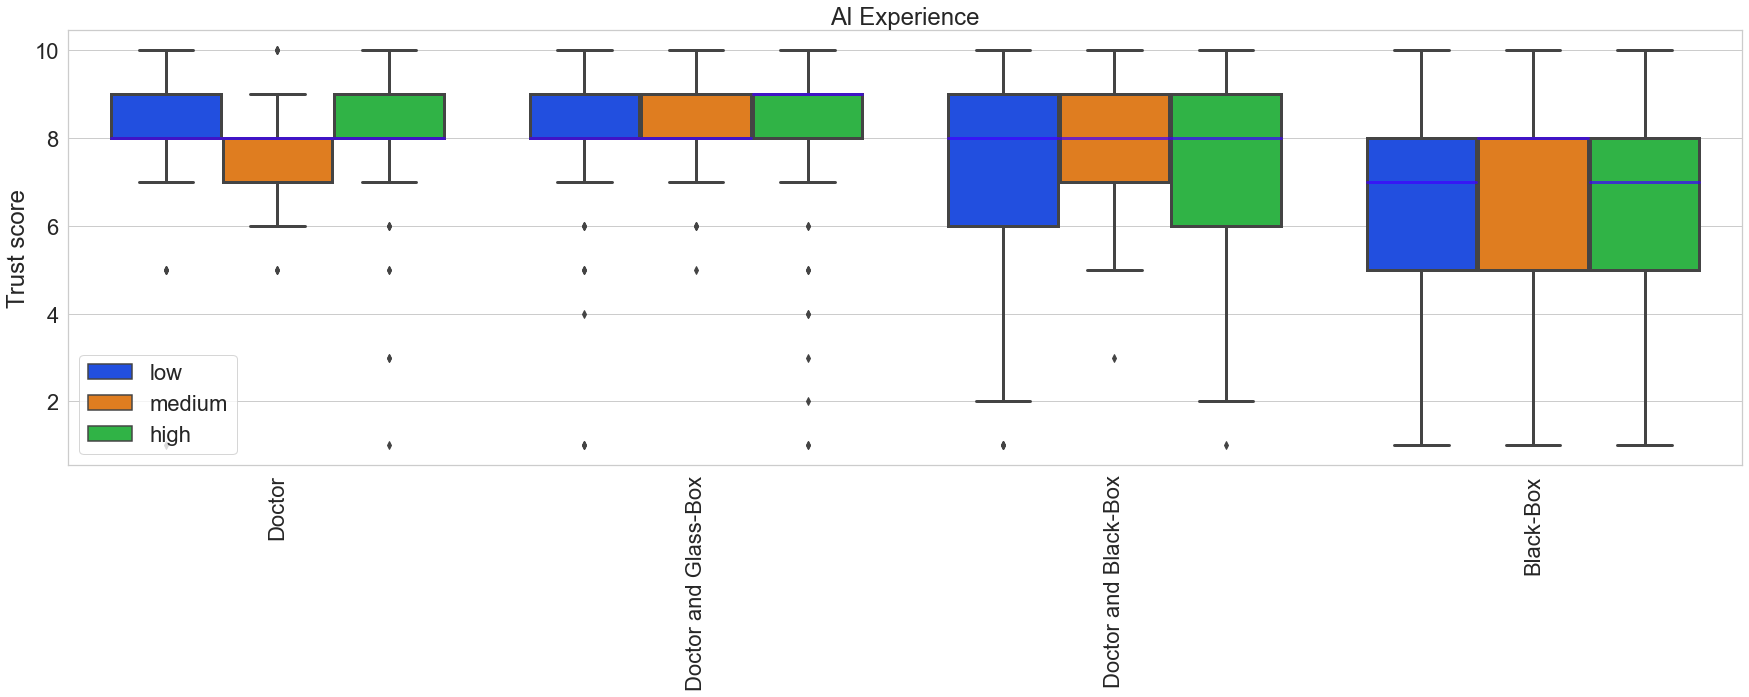

In [60]:
def ai_box_plot(axes=None, showy=False):
    ai_df = pd.melt(raw_data[[ai_binned, dr, dr_gb, dr_bb, bb]], id_vars=[ai_binned])
    ax = sns.boxplot(x="variable", y="value", data=ai_df, hue=ai_binned, linewidth=line_width, medianprops=medianprops,
                     ax=axes)
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_title('AI Experience')
    ax.legend(loc='lower left')
    ax.get_legend().set_title('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    if showy:
        ax.set_ylabel(box_y_label)


ai_box_plot(showy=True)

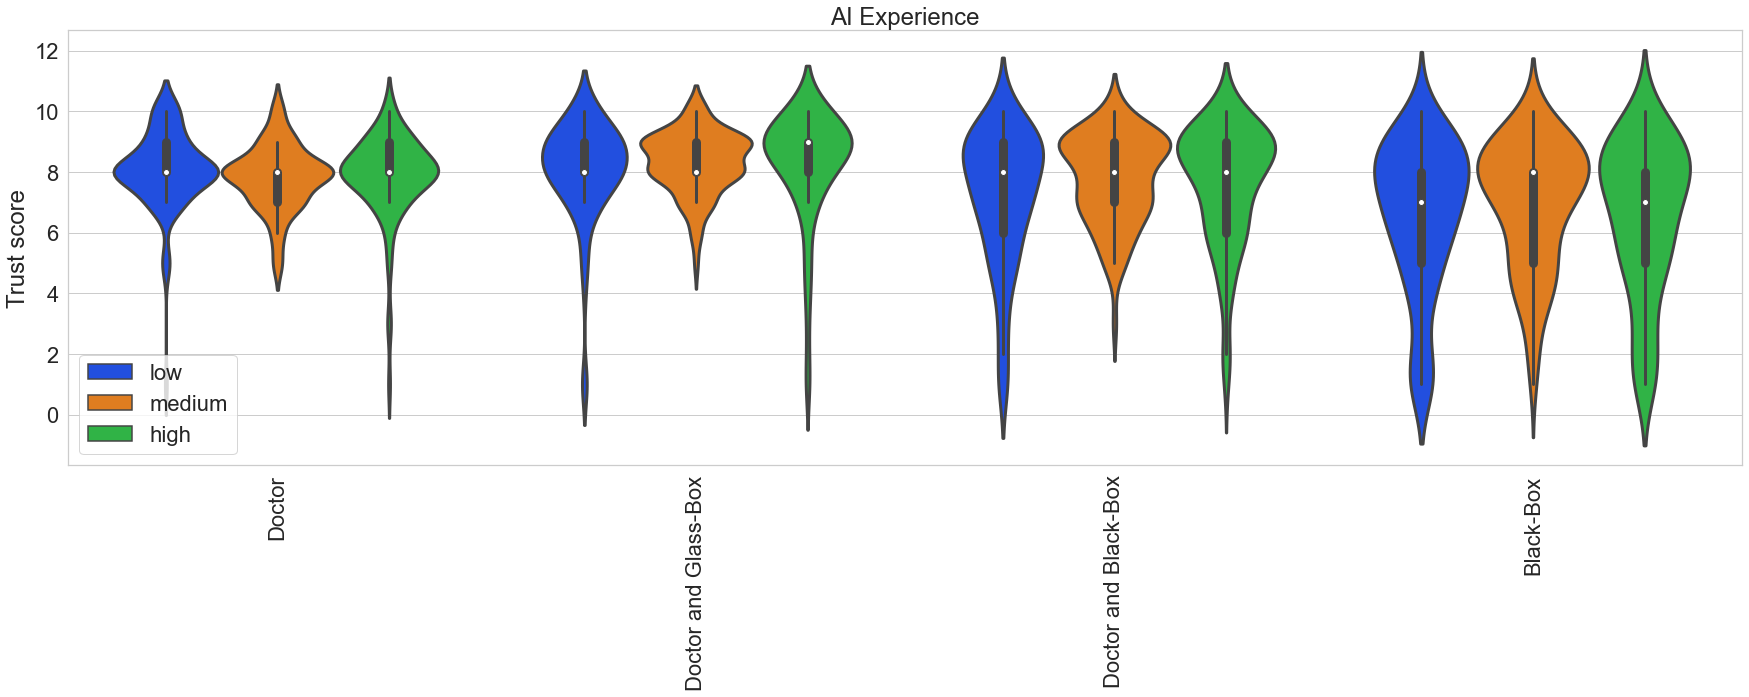

In [61]:
def ai_violin_plot(axes=None, showy=False):
    ai_df = pd.melt(raw_data[[ai_binned, dr, dr_gb, dr_bb, bb]], id_vars=[ai_binned])
    ax = sns.violinplot(x="variable", y="value", data=ai_df, hue=ai_binned, linewidth=line_width,
                        medianprops=medianprops, ax=axes)
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_title('AI Experience')
    ax.legend(loc='lower left')
    ax.get_legend().set_title('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    if showy:
        ax.set_ylabel(box_y_label)


ai_violin_plot(showy=True)

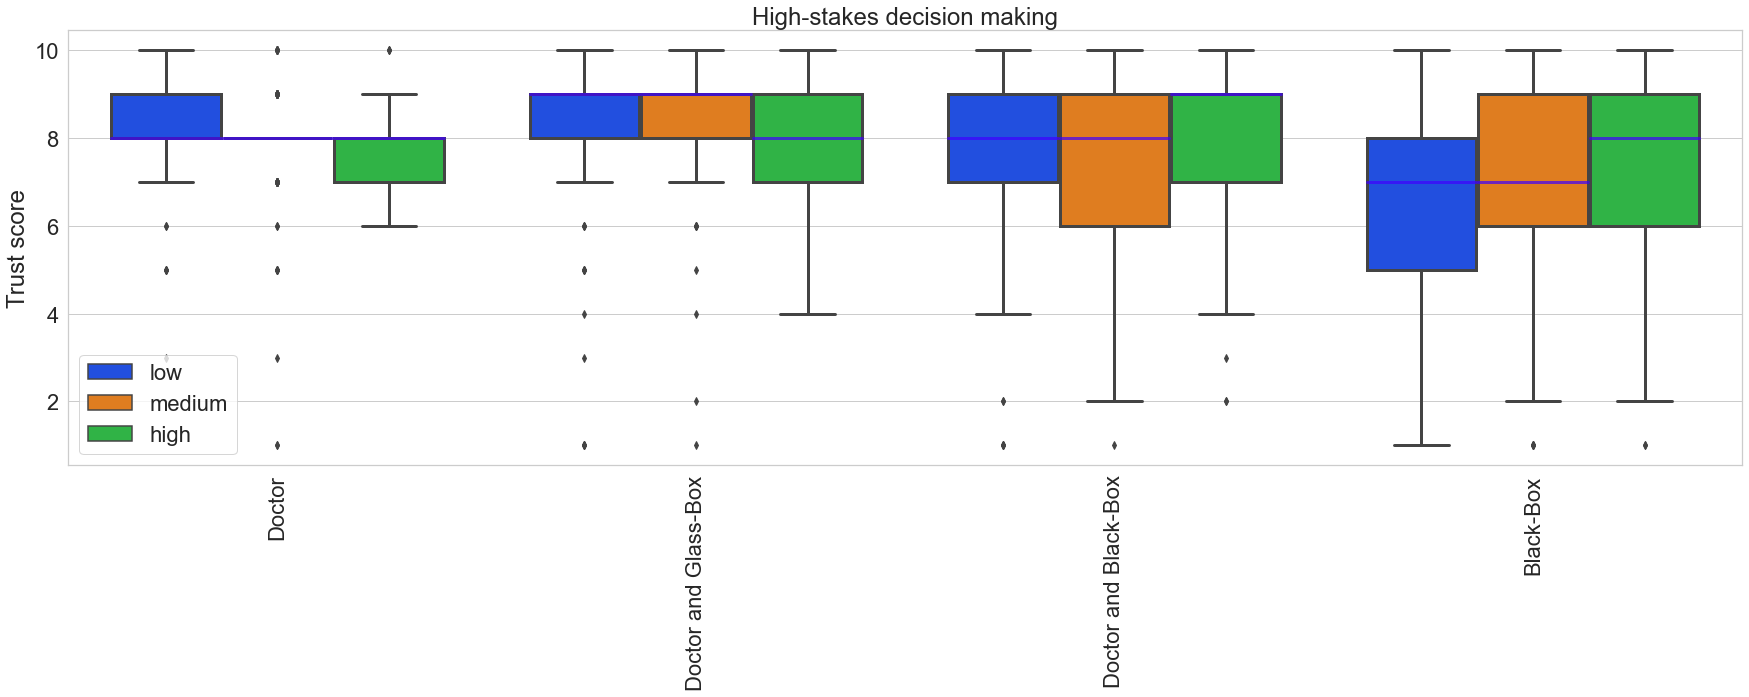

In [62]:
def high_stakes_box_plot(axes=None, showy=False):
    hs_df = pd.melt(raw_data[[highstakes_binned, dr, dr_gb, dr_bb, bb]], id_vars=[highstakes_binned])
    ax = sns.boxplot(x="variable", y="value", data=hs_df, hue=highstakes_binned, linewidth=line_width,
                     medianprops=medianprops, ax=axes)
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.legend(loc='lower left')
    ax.set_title('High-stakes decision making')
    ax.get_legend().set_title('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    if showy:
        ax.set_ylabel(box_y_label)


high_stakes_box_plot(showy=True)

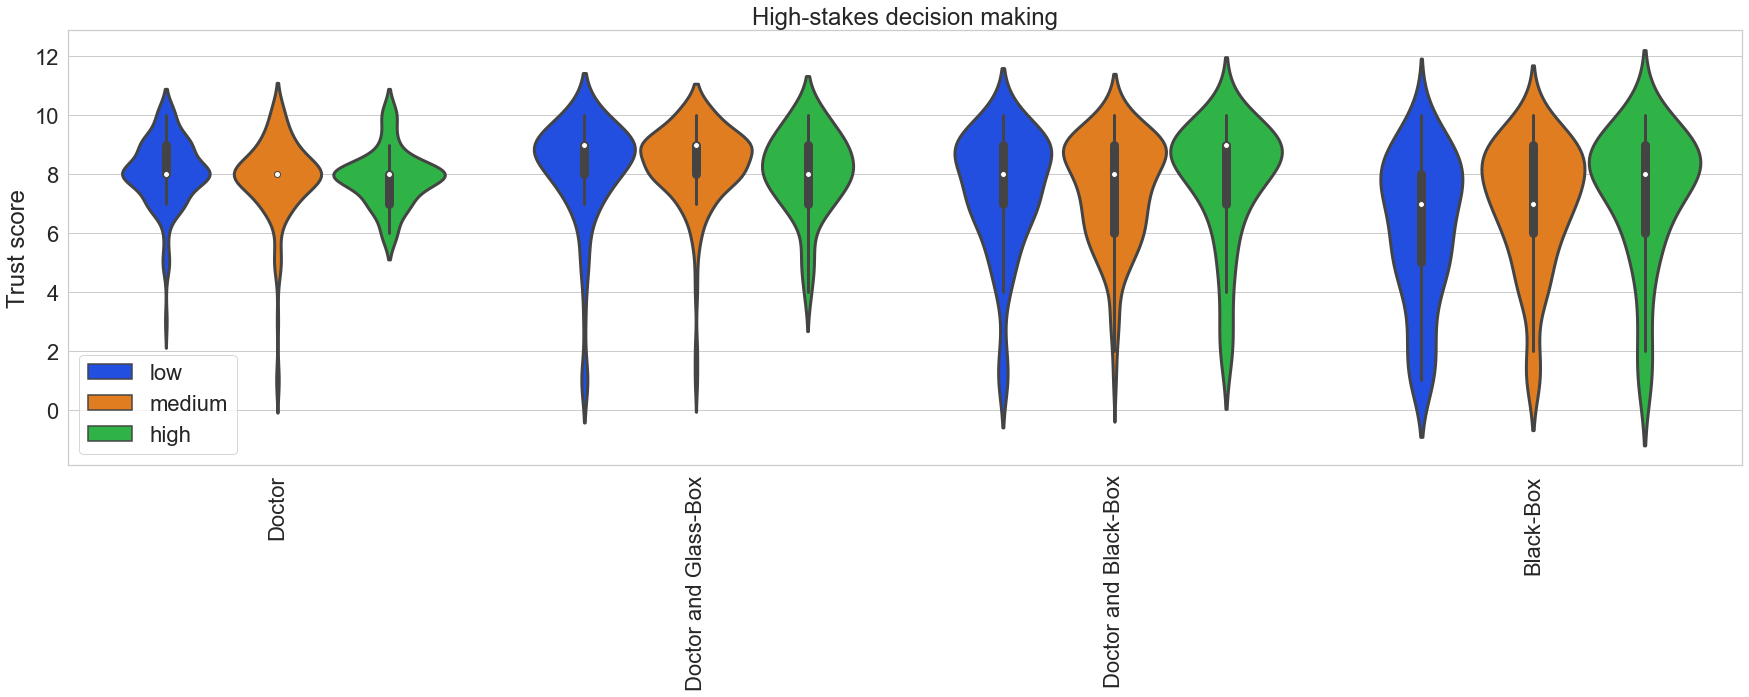

In [63]:
def high_stakes_violin_plot(axes=None, showy=False):
    hs_df = pd.melt(raw_data[[highstakes_binned, dr, dr_gb, dr_bb, bb]], id_vars=[highstakes_binned])
    ax = sns.violinplot(x="variable", y="value", data=hs_df, hue=highstakes_binned, linewidth=line_width,
                        medianprops=medianprops, ax=axes)
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.legend(loc='lower left')
    ax.set_title('High-stakes decision making')
    ax.get_legend().set_title('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    if showy:
        ax.set_ylabel(box_y_label)


high_stakes_violin_plot(showy=True)

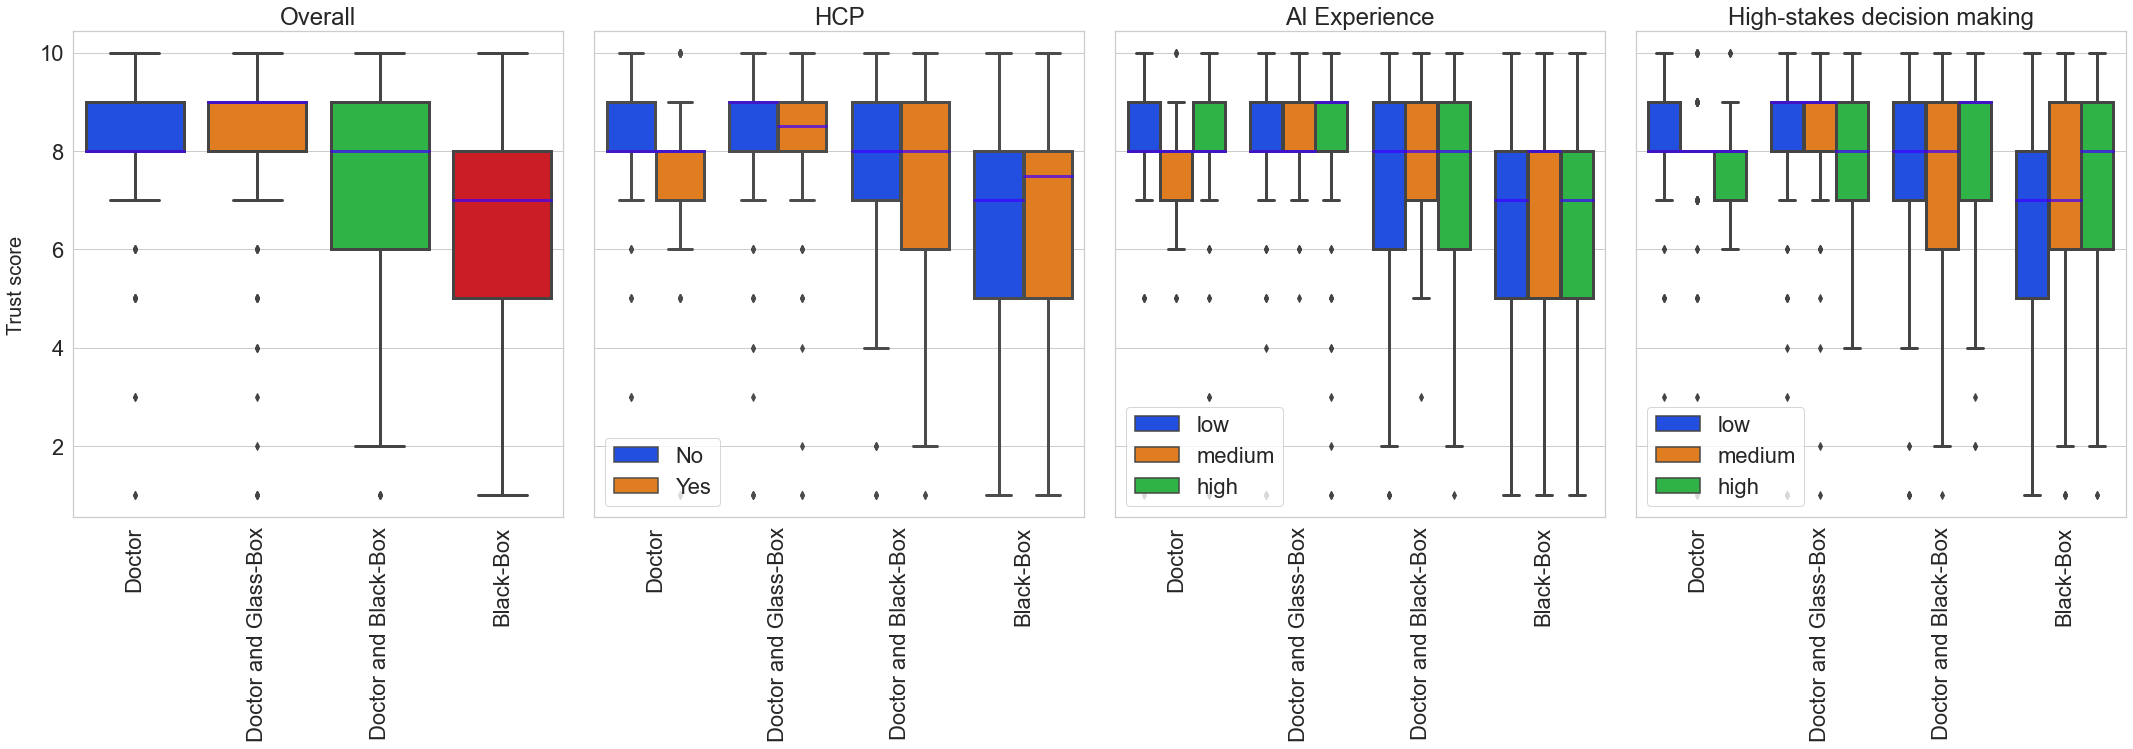

In [64]:
# Arrange in One chart
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True)
fig.tight_layout(h_pad=1, w_pad=0)
fig.text(0, 0.5, box_y_label, va='center', rotation='vertical', fontsize=smaller_font)

overall_box_plot(axes[0])
hcp_box_plot(axes[1])
ai_box_plot(axes[2])
high_stakes_box_plot(axes[3])


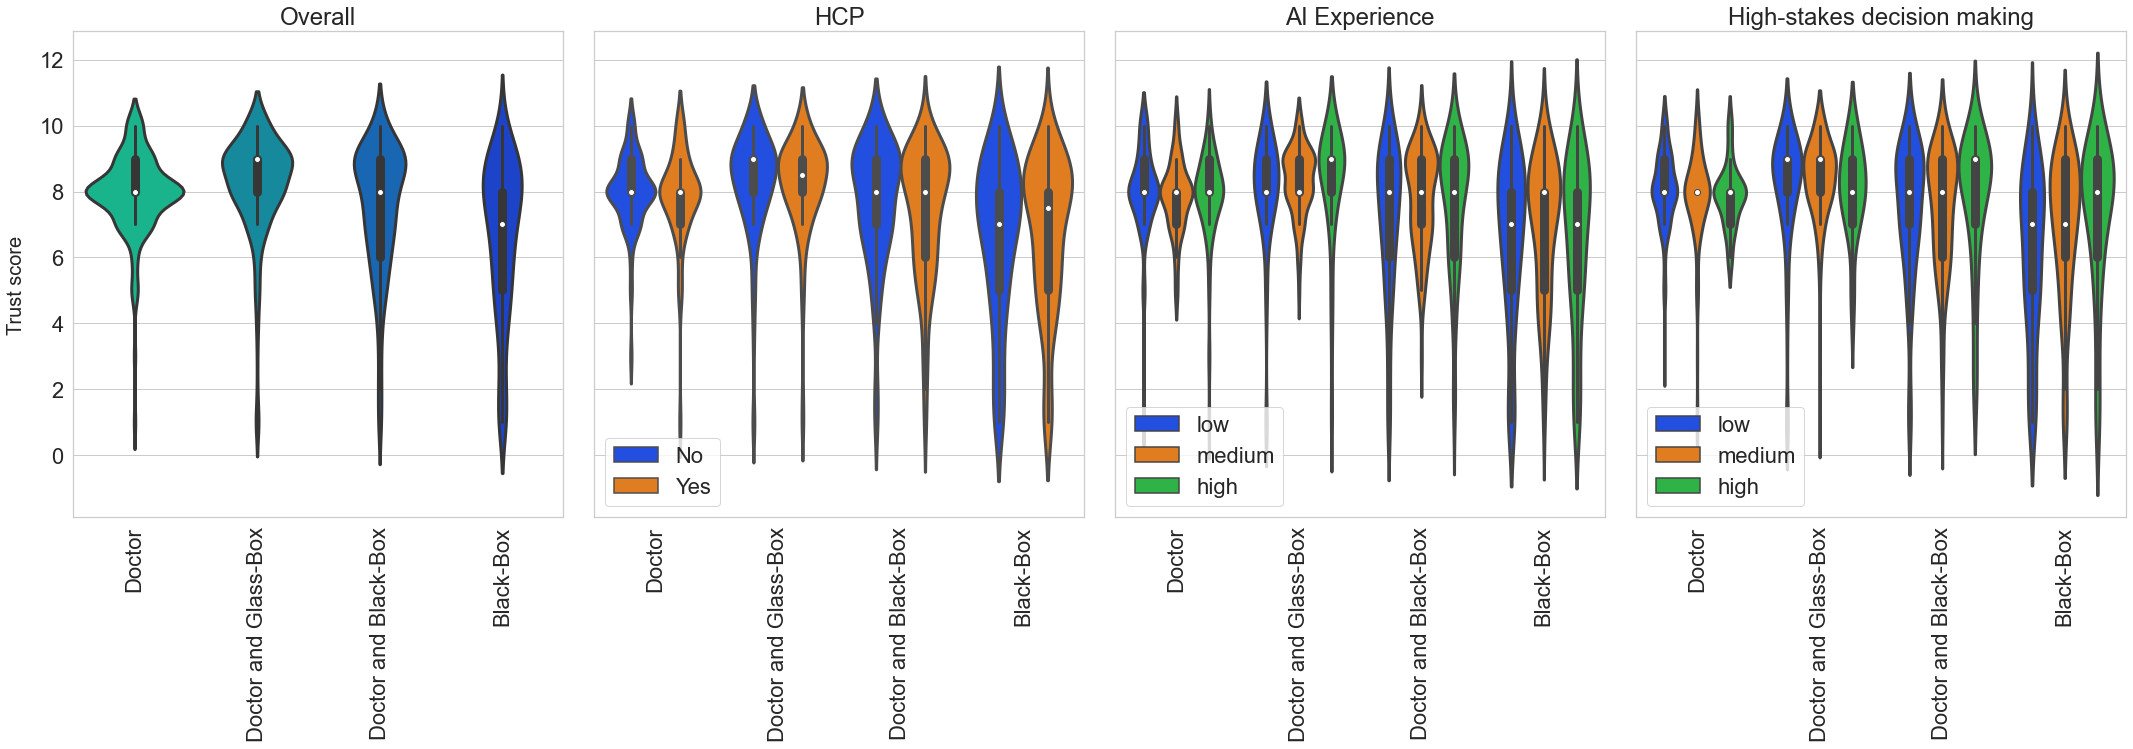

In [65]:
# Arrange in One chart
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True)
fig.tight_layout(h_pad=1, w_pad=0)
fig.text(0, 0.5, box_y_label, va='center', rotation='vertical', fontsize=smaller_font)

overall_violin_plot(axes[0])
hcp_violin_plot(axes[1])
ai_violin_plot(axes[2])
high_stakes_violin_plot(axes[3])


# Trust Ranking per answer

This ranks each answers from 1-4 no matter how much the trust was, 1 highest ranking, 4 lowest ranking

In [66]:
        df = pd.DataFrame(data={
    'scen1': [10, 3, 7],
    'scen3': [5, 2, 1],
    'scen4': [8, 2, 2],
    'scen5': [6, 10, 4],
})
df

,scen1,scen3,scen4,scen5
0,10,5,8,6
1,3,2,2,10
2,7,1,2,4


In [67]:
df.rank(axis=1, method='min')

,scen1,scen3,scen4,scen5
0,4.0,1.0,3.0,2.0
1,3.0,1.0,1.0,4.0
2,4.0,1.0,2.0,3.0


In [68]:
df.rank(method='min')

,scen1,scen3,scen4,scen5
0,3.0,3.0,3.0,2.0
1,1.0,2.0,1.0,3.0
2,2.0,1.0,1.0,1.0


In [69]:
ranked_df = raw_data[[dr, dr_gb, dr_bb, bb]].rank(axis=1, method='average').astype(int)
ranked_df

,Doctor,Doctor and Glass-Box,Doctor and Black-Box,Black-Box
0,3,3,2,1
1,2,4,2,1
2,2,1,2,4
3,4,3,2,1
4,3,4,2,1
...,...,...,...,...
273,2,2,4,1
274,2,4,2,2
275,1,3,1,3
276,3,4,1,1


In [70]:
total_no = ranked_df.shape[0]
value_c = ranked_df.apply(pd.Series.value_counts)
value_c = value_c.apply(lambda x: (x / total_no) * 100)


(0.0, 100.0)

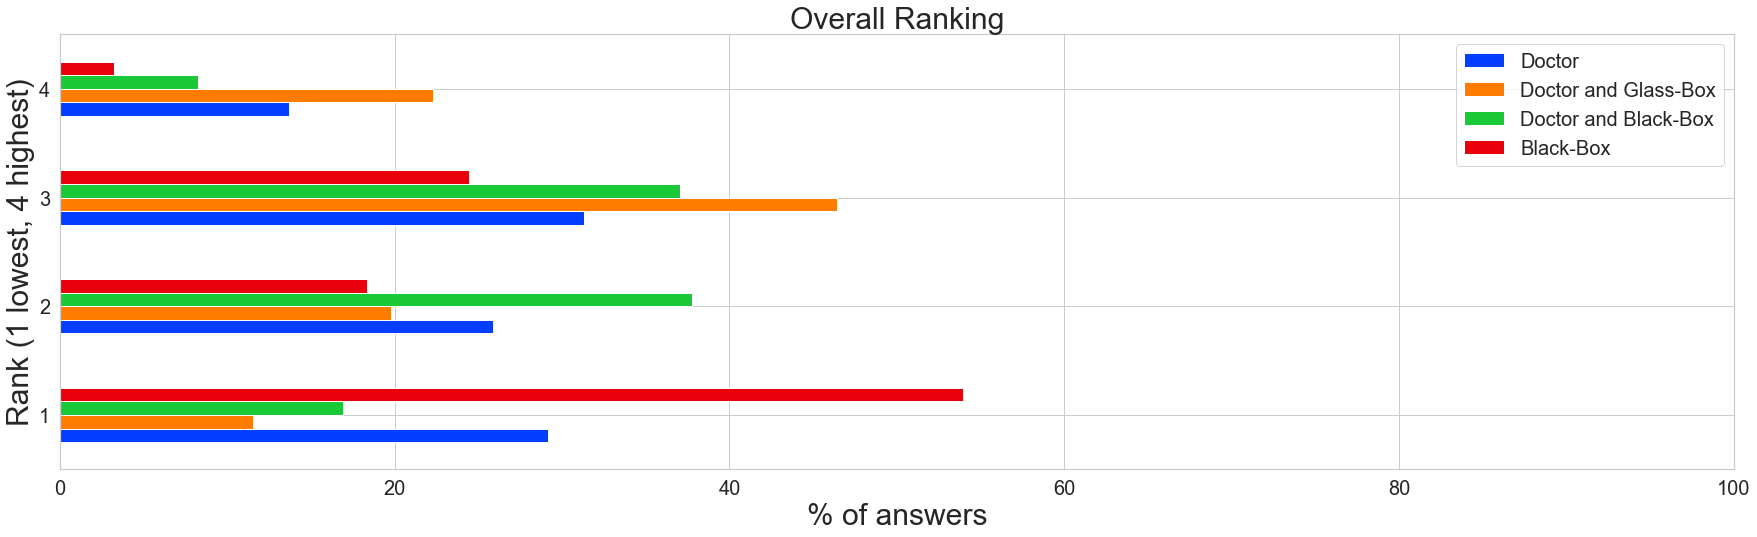

In [71]:
import matplotlib.pyplot as plt

fontsize = 30

plt.close("all")
hcp = value_c.plot.barh()
plt.title('Overall Ranking', fontsize=fontsize)
plt.ylabel('Rank (1 lowest, 4 highest)', fontsize=fontsize)
plt.xlabel('% of answers', fontsize=fontsize)
plt.xticks(fontsize=fontsize * 2 / 3, rotation=0)
plt.yticks(fontsize=fontsize * 2 / 3)
plt.legend(fontsize=fontsize * 2 / 3)
hcp.set_xlim(0, 100)

<AxesSubplot:>

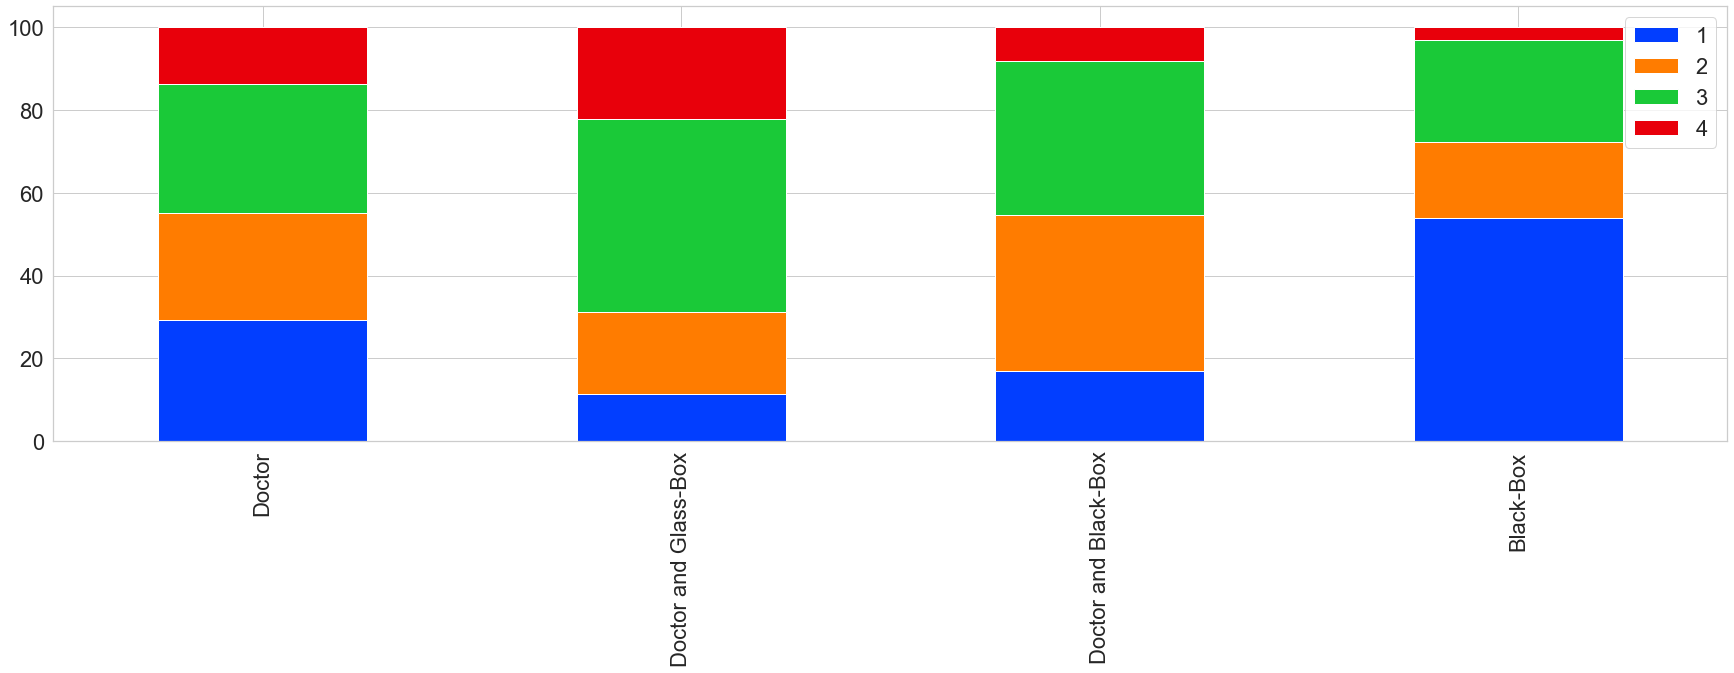

In [72]:
value_c.T.plot.bar(stacked=True)

### Demographics

In [73]:
def sub_frame_for(column, value):
    indices = raw_data[column].loc[lambda x: x == value].index
    return ranked_df.iloc[indices]


def ranking_for(column, value):
    ranking = sub_frame_for(column, value)
    number_of_answers = ranking.shape[0]
    ranking = ranking.apply(pd.Series.value_counts)
    return ranking.apply(lambda x: (x / number_of_answers) * 100)


def bar_chart_for(column, value, title, axes):
    ranking = ranking_for(column, value)
    ax = ranking.plot.barh(title=title, ax=axes)
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel('% of answers', fontsize=fontsize)
    ax.set_ylabel('Rank (1 lowest, 4 highest)', fontsize=fontsize)
    ax.legend(fontsize=fontsize * 2 / 3)
    ax.set_xlim(0, 100)


def bar_stacked_for(column, value, title, axes, stacked=True):
    ranking = ranking_for(column, value)
    ax = ranking.T.plot.bar(stacked=stacked, title=title, ax=axes, legend=0)
    ax.set_title(title, fontsize=fontsize * 2 / 3)
    if not stacked:
        ax.set_ylim(0, 70)

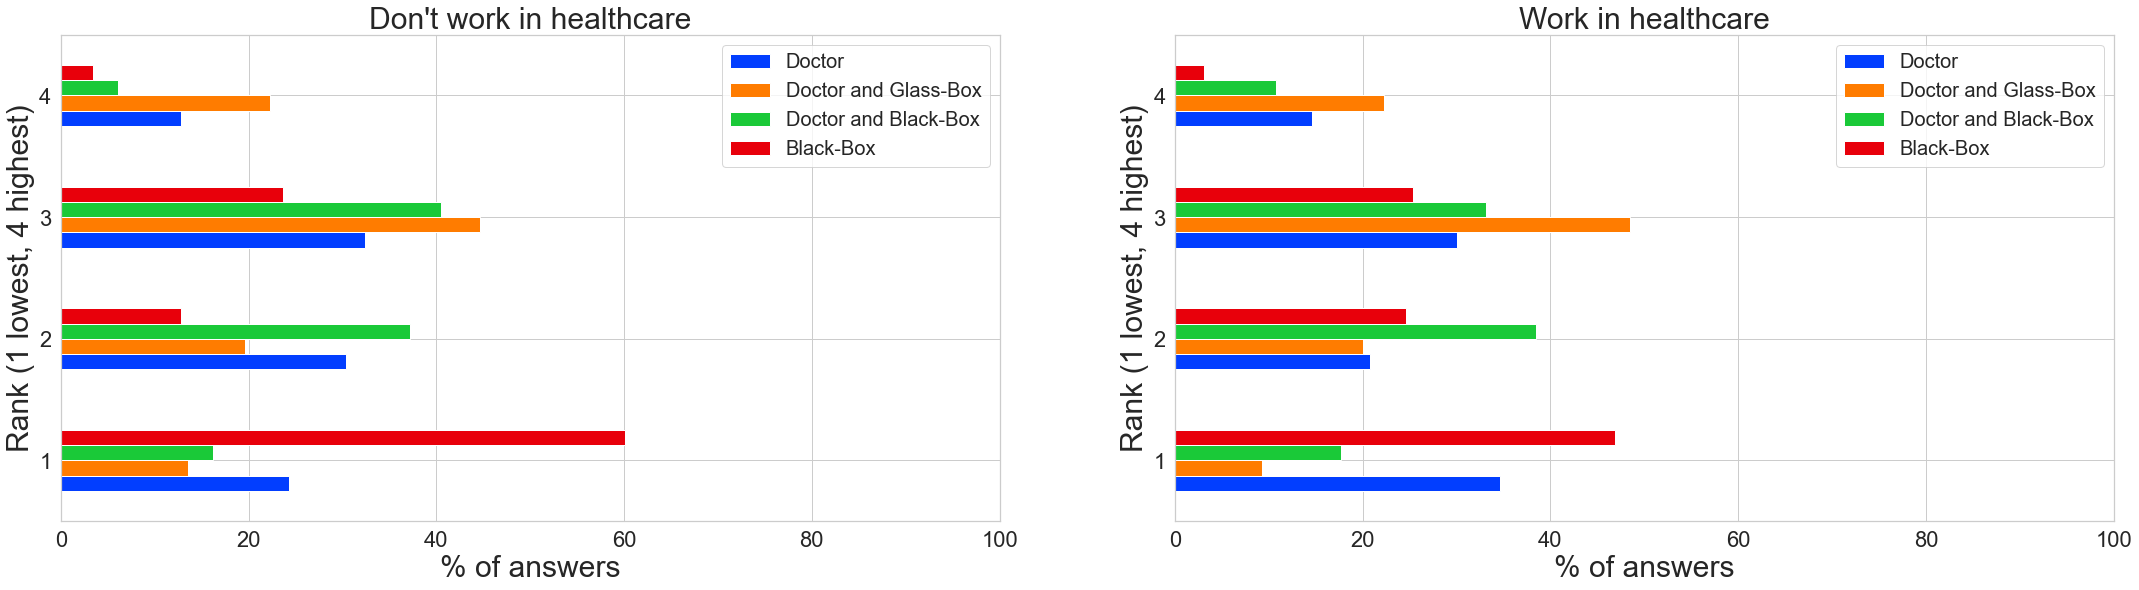

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(h_pad=5, w_pad=5)

no_HCP = ranking_for(health, 'No')
HCP = ranking_for(health, 'Yes')

bar_chart_for(health, 'No', "Don\'t work in healthcare", axes[0])
bar_chart_for(health, 'Yes', 'Work in healthcare', axes[1])

IndexError: index 0 is out of bounds for axis 0 with size 0

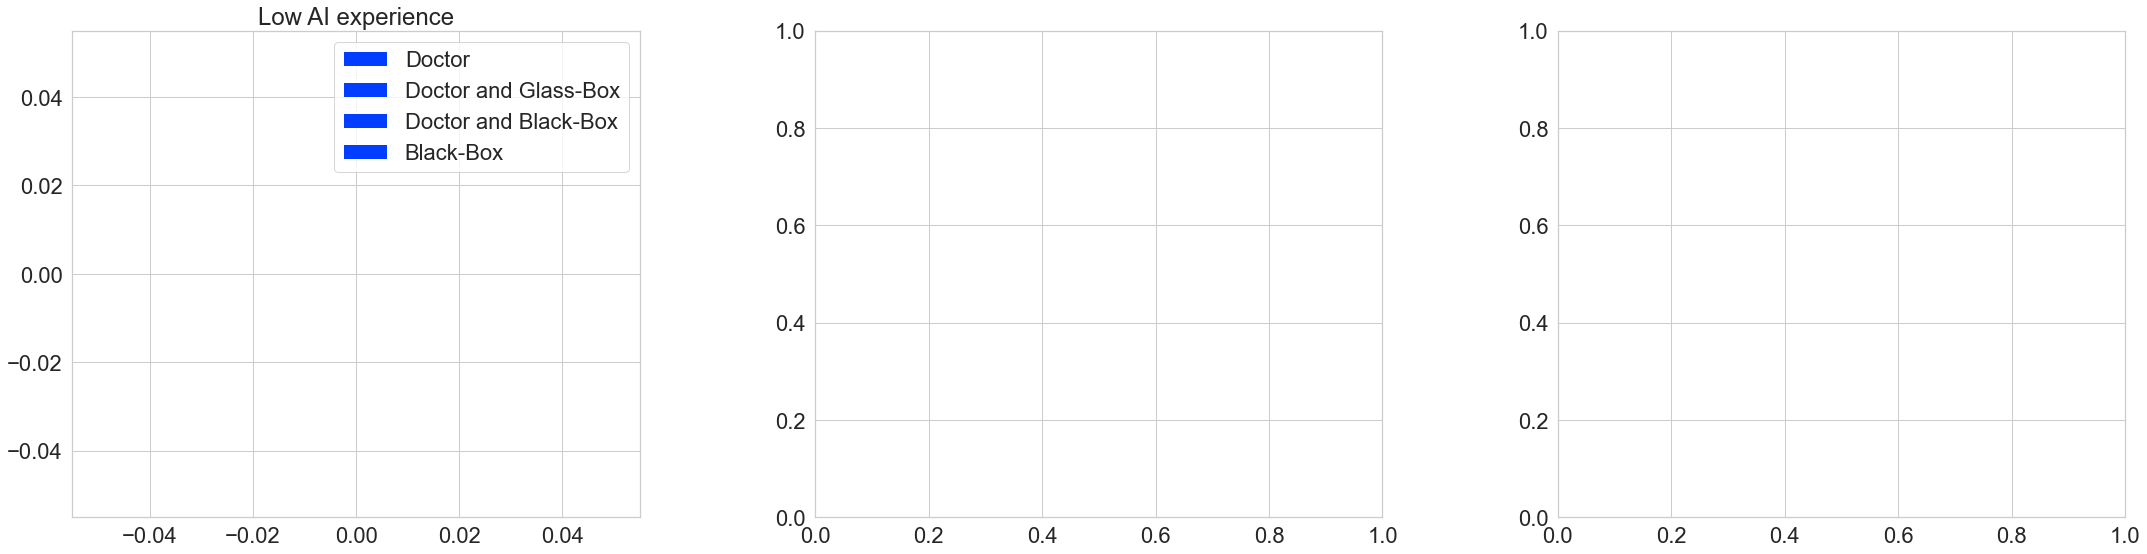

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.tight_layout(h_pad=5, w_pad=5)
bar_chart_for(ai_binned, 0, 'Low AI experience', axes[0])
bar_chart_for(ai_binned, 1, 'Medium AI experience', axes[1])
bar_chart_for(ai_binned, 2, 'High AI experience', axes[2])

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.tight_layout(h_pad=2, w_pad=2)
fig.suptitle('AI experience', fontsize=fontsize)

bar_stacked_for(ai_binned, 0, 'Low', axes[0])
bar_stacked_for(ai_binned, 1, 'Medium', axes[1])
bar_stacked_for(ai_binned, 2, 'High', axes[2])

handles, labels = hcp.get_legend_handles_labels()
fig.legend(handles, ['lowest', '2nd lowest', '2nd highest', 'highest'], loc='upper right', fontsize=fontsize * 2 / 3)
fig.subplots_adjust(top=0.85, right=0.85)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.tight_layout(h_pad=5, w_pad=5)
bar_chart_for(highstakes_binned, 0, 'Low high-stakes decisions', axes[0])
bar_chart_for(highstakes_binned, 1, 'Medium high-stakes decisions', axes[1])
bar_chart_for(highstakes_binned, 2, 'High high-stakes decisions', axes[2])


In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.tight_layout(h_pad=2, w_pad=2)
fig.suptitle('High-Stakes Decisions', fontsize=fontsize)

bar_stacked_for(highstakes_binned, 0, 'Low', axes[0])
bar_stacked_for(highstakes_binned, 1, 'Medium', axes[1])
bar_stacked_for(highstakes_binned, 2, 'High', axes[2])

handles, labels = hcp.get_legend_handles_labels()
fig.legend(handles, ['lowest', '2nd lowest', '2nd highest', 'highest'], loc='upper right', fontsize=fontsize * 2 / 3)
fig.subplots_adjust(top=0.85, right=0.85)

### Ties

In [ ]:
unique_ranking = ranked_df.nunique(axis=1)
unique_ranking.value_counts()